In [1]:
# Data manipulation & visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Evaluation / Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import learning_curve, ShuffleSplit

import time
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Load Data

In [2]:
data_file='diabetes_top10.csv'
data_description='Data/Diabetes_Variable_Description.xlsx'

In [3]:
# Display the diabetes dataset's column information
desc = pd.read_excel(data_description)
pd.set_option('display.max_colwidth', None)
desc[['Variable Name', 'Type', 'Description']]


Variable Name     Type  \
0                     ID  Integer   
1        Diabetes_binary   Binary   
2                 HighBP   Binary   
3               HighChol   Binary   
4              CholCheck   Binary   
5                    BMI  Integer   
6                 Smoker   Binary   
7                 Stroke   Binary   
8   HeartDiseaseorAttack   Binary   
9           PhysActivity   Binary   
10                Fruits   Binary   
11               Veggies   Binary   
12     HvyAlcoholConsump   Binary   
13         AnyHealthcare   Binary   
14           NoDocbcCost   Binary   
15               GenHlth  Integer   
16              MentHlth  Integer   
17              PhysHlth  Integer   
18              DiffWalk   Binary   
19                   Sex   Binary   
20                   Age  Integer   
21             Education  Integer   
22                Income  Integer   

                                                                                                                                                                                                                                                                                                                                Description  
0                                                                                                                                                                                                                                                                                                                                Patient ID  
1                                                                                                                                                                                                                                                                                               0 = no diabetes 1 = prediabetes or diabetes  
2                                                                                                                                                                                                                                                                                                                0 = no high BP 1 = high BP  
3                                                                                                                                                                                                                                                                                              0 = no high cholesterol 1 = high cholesterol  
4                                                                                                                                                                                                                                                                  0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years  
5                                                                                                                                                                                                                                                                                                                           Body Mass Index  
6                                                                                                                                                                                                                              Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes  
7                                                                                                                                                                                                                                                                                              (Ever told) you had a stroke. 0 = no 1 = yes  
8                                                                                                                   

In [4]:
# Import the Diabetes dataset:
data = pd.read_csv(data_file) 

## 2. EDA

In [5]:
data.head()

HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  PhysHlth  DiffWalk  \
0     1.0       1.0  40.0                   0.0      5.0      15.0       1.0   
1     0.0       0.0  25.0                   0.0      3.0       0.0       0.0   
2     1.0       1.0  28.0                   0.0      5.0      30.0       1.0   
3     1.0       0.0  27.0                   0.0      2.0       0.0       0.0   
4     1.0       1.0  24.0                   0.0      2.0       0.0       0.0   

    Age  Education  Income  target  
0   9.0        4.0     3.0     0.0  
1   7.0        6.0     1.0     0.0  
2   9.0        4.0     8.0     0.0  
3  11.0        3.0     6.0     0.0  
4  11.0        5.0     4.0     0.0

In [6]:
data.shape

(228756, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228756 entries, 0 to 228755
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                228756 non-null  float64
 1   HighChol              228756 non-null  float64
 2   BMI                   228756 non-null  float64
 3   HeartDiseaseorAttack  228756 non-null  float64
 4   GenHlth               228756 non-null  float64
 5   PhysHlth              228756 non-null  float64
 6   DiffWalk              228756 non-null  float64
 7   Age                   228756 non-null  float64
 8   Education             228756 non-null  float64
 9   Income                228756 non-null  float64
 10  target                228756 non-null  float64
dtypes: float64(11)
memory usage: 19.2 MB


In [8]:
data.shape

(228756, 11)

## 3. Set Target

In [9]:
y = data['target']

In [10]:
y.value_counts()

target
0.0    193770
1.0     34986
Name: count, dtype: int64

## 4. Set Features

In [11]:
data.columns

Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income', 'target'],
      dtype='object')

In [12]:
# We will start with all the features first (except for the target column)

X = data.drop('target', axis=1)


In [13]:
X.head()

HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  PhysHlth  DiffWalk  \
0     1.0       1.0  40.0                   0.0      5.0      15.0       1.0   
1     0.0       0.0  25.0                   0.0      3.0       0.0       0.0   
2     1.0       1.0  28.0                   0.0      5.0      30.0       1.0   
3     1.0       0.0  27.0                   0.0      2.0       0.0       0.0   
4     1.0       1.0  24.0                   0.0      2.0       0.0       0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

## 5. Model Training

In [14]:
# Set a random seed for reproducibility
random_state=42

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

In [16]:
# Initialise the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Apply SMOTE to the training data
## the default sampling_strategy will resample the minority class to match the size of the majority class, achieving the 1:1 ratio,
## (which is similar to the real diabetes data reported by CDC)
smote = SMOTE(random_state=random_state)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

### Model selection

We will create 4 basic models

In [18]:
'''
# Logistic Regression
lr = LogisticRegression()

# Naive Bayes
nb = GaussianNB()

# Decision Tree
dt = DecisionTreeClassifier()

# Random Forest
rf = RandomForestClassifier()
'''

'\n# Logistic Regression\nlr = LogisticRegression()\n\n# Naive Bayes\nnb = GaussianNB()\n\n# Decision Tree\ndt = DecisionTreeClassifier()\n\n# Random Forest\nrf = RandomForestClassifier()\n'

In [19]:
# Function to prepare and train base model
def clsModel(model, predictors, target, random_state=42):
    # Start timing the model 
    tic = time.time()
    
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, stratify=target, random_state=random_state)
    
    # Initialise the scaler
    scaler = StandardScaler()
    
    # Fit the scaler on the training data and transform both training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
         
    # Start timing the model training
    tic = time.time()
    
    # Train the model and do initial evaluation on the predictions
    clsModel = model
    fitMod = clsModel.fit(X_train_scaled, y_train)
    feature_cols = predictors.columns
    predictArr01 = fitMod.predict(X_test_scaled)
    predictProbaArr01 = fitMod.predict_proba(X_test_scaled)
    accScore = fitMod.score(X_test_scaled, y_test)

    # End timing 
    toc = time.time()
    
    # Calculate runtime in milliseconds
    runtime = (toc - tic) * 1000

    return [clsModel, X_train_scaled, X_test_scaled, y_train, y_test, feature_cols, predictArr01, predictProbaArr01, accScore, runtime]

In [20]:
# Function to prepare and train the model with SMOTE
def clsModel_SMOTE(model, predictors, target, random_state=42):
    # Start timing the model 
    tic = time.time()
    
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, stratify=target, random_state=random_state)
    
    # Initialise the scaler
    scaler = StandardScaler()
    
    # Fit the scaler on the training data and transform both training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=random_state)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

    # Train the model and do initial evaluation on the predictions
    clsModel = model
    fitMod = clsModel.fit(X_train_smote, y_train_smote)
    feature_cols = predictors.columns
    predictArr01 = fitMod.predict(X_test_scaled)
    predictProbaArr01 = fitMod.predict_proba(X_test_scaled)
    accScore = fitMod.score(X_test_scaled, y_test)

    # End timing 
    toc = time.time()
    
    # Calculate runtime in milliseconds
    runtime = (toc - tic) * 1000

    return [clsModel, X_train_scaled, X_test_scaled, y_train, y_test, feature_cols, predictArr01, predictProbaArr01, accScore, runtime]

In [21]:
# Function to prepare and train the model with class weights
def clsModel_ClassWeights(model, predictors, target, class_weight='balanced', random_state=42):
    # Start timing the model 
    tic = time.time()
    
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, stratify=target, random_state=random_state)
    
    # Initialise the scaler
    scaler = StandardScaler()
    
    # Fit the scaler on the training data and transform both training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model and do initial evaluation on the predictions
    
    # Check if the model is GaussianNB
    if isinstance(model, GaussianNB):
        # For GaussianNB, we can't use class_weight, so we'll use it as is
        clsModel = model
    else:
        # For other models, apply class weights
        clsModel = model.set_params(class_weight=class_weight)
    
    fitMod = clsModel.fit(X_train_scaled, y_train)
    feature_cols = predictors.columns
    predictArr01 = fitMod.predict(X_test_scaled)
    predictProbaArr01 = fitMod.predict_proba(X_test_scaled)
    accScore = fitMod.score(X_test_scaled, y_test)

    # End timing 
    toc = time.time()
    
    # Calculate runtime in milliseconds
    runtime = (toc - tic) * 1000

    return [clsModel, X_train_scaled, X_test_scaled, y_train, y_test, feature_cols, predictArr01, predictProbaArr01, accScore, runtime]


In [22]:
# Create models
lr = LogisticRegression(random_state=random_state)
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=random_state)
rf = RandomForestClassifier(random_state=random_state)


In [23]:
# Train base models 
lr_base = clsModel(lr, X, y)
nb_base = clsModel(nb, X, y)
dt_base = clsModel(dt, X, y)
rf_base = clsModel(rf, X, y)

In [24]:
# Train models using SMOTE
lr_SMOTE = clsModel_SMOTE(lr, X, y)
nb_SMOTE = clsModel_SMOTE(nb, X, y)
dt_SMOTE = clsModel_SMOTE(dt, X, y)
rf_SMOTE = clsModel_SMOTE(rf, X, y)

In [25]:
# Train models using balanced class weights
lr_ClassWeights = clsModel_ClassWeights(lr, X, y)
nb_ClassWeights = clsModel_ClassWeights(nb, X, y)
dt_ClassWeights = clsModel_ClassWeights(dt, X, y)
rf_ClassWeights = clsModel_ClassWeights(rf, X, y)

In [26]:
# Or use manual setting for class_weight using original target value counts:
class_weights_dict = {0.0: 1/194377, 1.0: 1/35097}

# Train models using manual class weights
lr_ClassWeights_m = clsModel_ClassWeights(lr, X, y, class_weight=class_weights_dict)
nb_ClassWeights_m = clsModel_ClassWeights(nb, X, y, class_weight=class_weights_dict)
dt_ClassWeights_m = clsModel_ClassWeights(dt, X, y, class_weight=class_weights_dict)
rf_ClassWeights_m = clsModel_ClassWeights(rf, X, y, class_weight=class_weights_dict)

## 6. Performance Evaluation

In [27]:
# Function to plot the ROC curve
def rocCurve(predProbArr, y_test):
    preds = predProbArr # preds = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)
    roc_auc01 = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    lw = 1
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc01)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver Operating Characteristic', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc01

In [28]:
# Function to plot the Precision-Recall curve
def prCurve(y_test, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    # Calculate Average Precision
    ap = average_precision_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'Average Precision = {ap:.3f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

Ref:

0- clsModel,

1- X_train_scaled, 

2- X_test_scaled, 

3- y_train, 

4- y_test, 

5- feature_cols, 

6- predictArr01, 

7- predictProbaArr01, 

8- accScore

9- runtime

In [29]:
# Function to evaluate the model
def evalModel(machMod):
    clsModel = machMod[0]
    X_train_scaled = machMod[1]
    y_train = machMod[3]
    y_test = machMod[4]
    y_pred_class = machMod[6]
    y_pred_proba = machMod[7]
    accScore = machMod[8]
    runtime = machMod[9]
    
    # Cross-validation scores
    crossValScore = cross_val_score(clsModel, X_train_scaled, y_train, cv=5)
    meanAcc = np.mean(crossValScore)
    print("Cross-validation scores: ", crossValScore)
    print("Mean Accuracy: ", meanAcc)
    print("Accuracy Score: ", accScore)
    
    # Classification report
    classReport = metrics.classification_report(y_test, y_pred_class)
    print("Classification Report:\n", classReport)

    # Runtime
    print(f"Training + Prediction Runtime: {runtime:.2f} ms")
    
    # Confusion matrix
    confusionMatrix = metrics.confusion_matrix(y_test, y_pred_class)
    print("Confusion Matrix:\n")
    plot_confusion_matrix(conf_mat=confusionMatrix,
                          class_names=['0_No Diabetes', '1_Diabetes'],
                          show_absolute=True,
                          show_normed=True,
                          colorbar=True)
    
    # ROC AUC
    auc = rocCurve(y_pred_proba[:, 1], y_test)
    print(f"ROC AUC: {auc:.2f}")

    # Precision-Recall Curve
    prCurve(y_test, y_pred_proba[:, 1])

Logistic Regression - Base model:
Cross-validation scores:  [0.72275651 0.72712796 0.73099981 0.72962593 0.72568306]
Mean Accuracy:  0.7272386541126592
Accuracy Score:  0.8510935929007534
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     58131
         1.0       0.55      0.15      0.24     10496

    accuracy                           0.85     68627
   macro avg       0.71      0.57      0.58     68627
weighted avg       0.82      0.85      0.81     68627

Training + Prediction Runtime: 187.33 ms
Confusion Matrix:



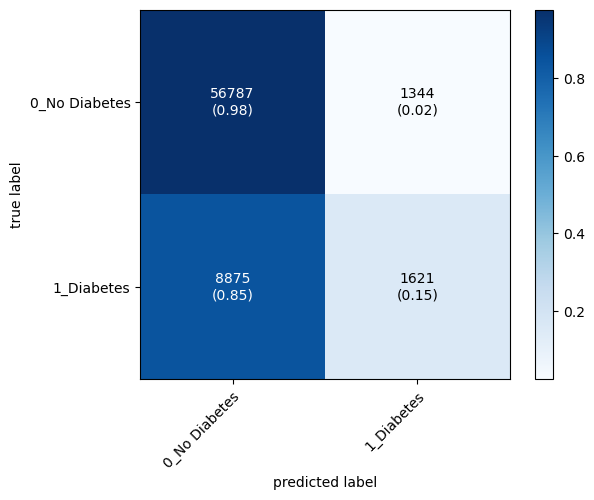

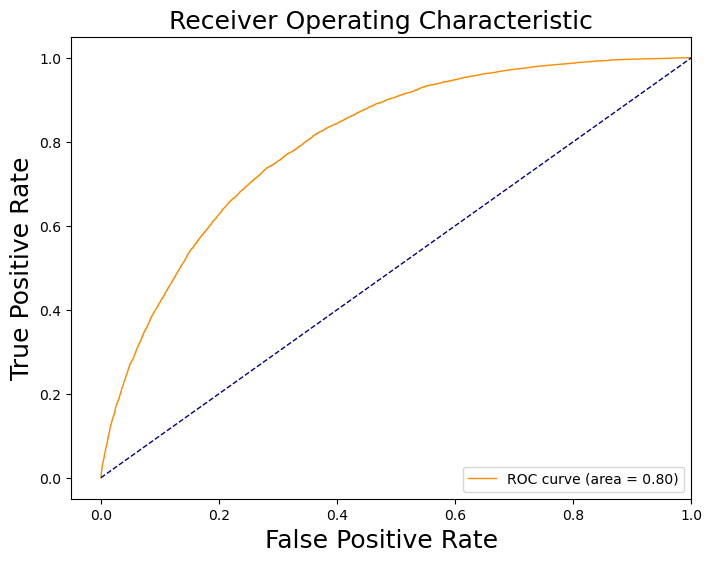

ROC AUC: 0.80


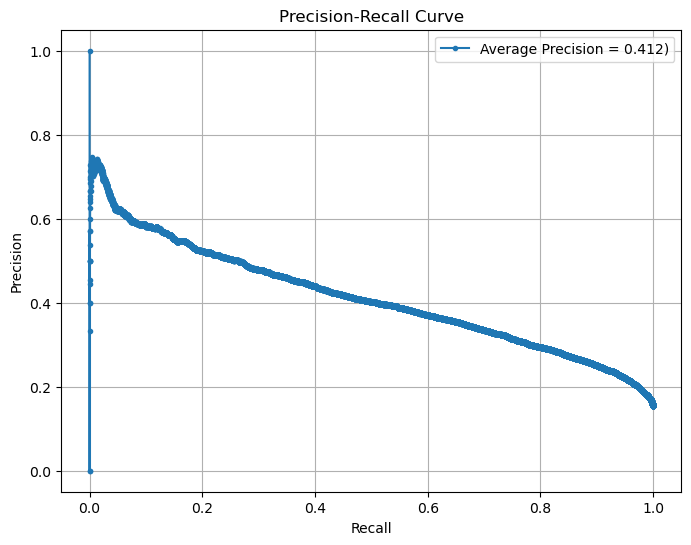

Logistic Regression with SMOTE:
Cross-validation scores:  [0.72275651 0.72712796 0.73099981 0.72962593 0.72568306]
Mean Accuracy:  0.7272386541126592
Accuracy Score:  0.7164235650691418
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     58131
         1.0       0.32      0.74      0.45     10496

    accuracy                           0.72     68627
   macro avg       0.63      0.73      0.63     68627
weighted avg       0.84      0.72      0.75     68627

Training + Prediction Runtime: 1212.75 ms
Confusion Matrix:



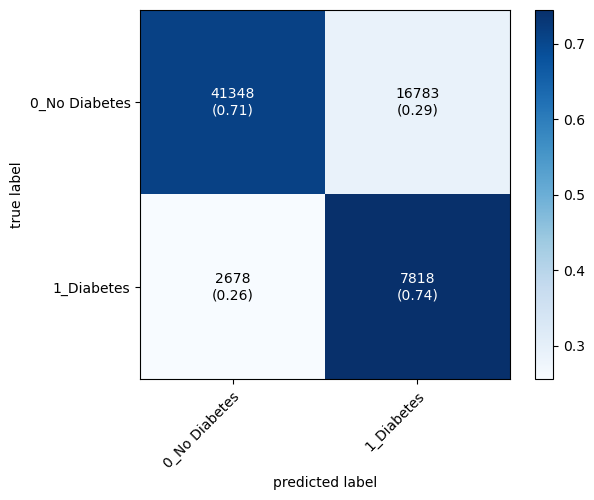

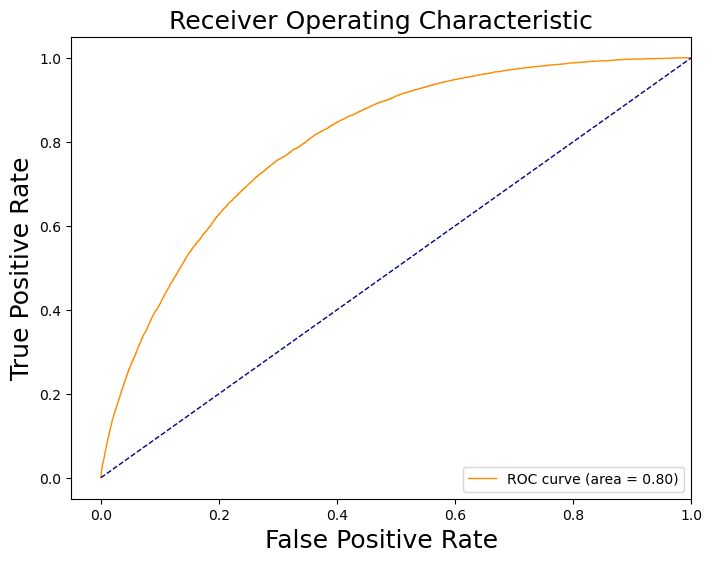

ROC AUC: 0.80


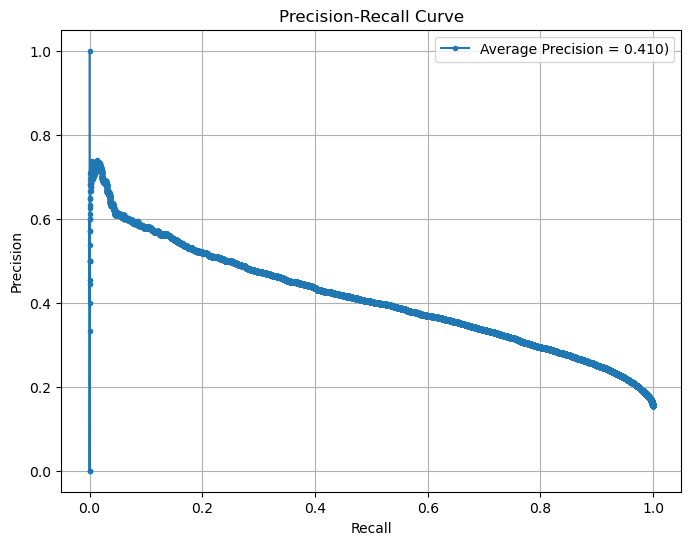


Logistic Regression with Balanced Class Weights:
Cross-validation scores:  [0.72275651 0.72712796 0.73099981 0.72962593 0.72568306]
Mean Accuracy:  0.7272386541126592
Accuracy Score:  0.7151995570256604
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     58131
         1.0       0.32      0.75      0.44     10496

    accuracy                           0.72     68627
   macro avg       0.63      0.73      0.63     68627
weighted avg       0.84      0.72      0.75     68627

Training + Prediction Runtime: 216.55 ms
Confusion Matrix:



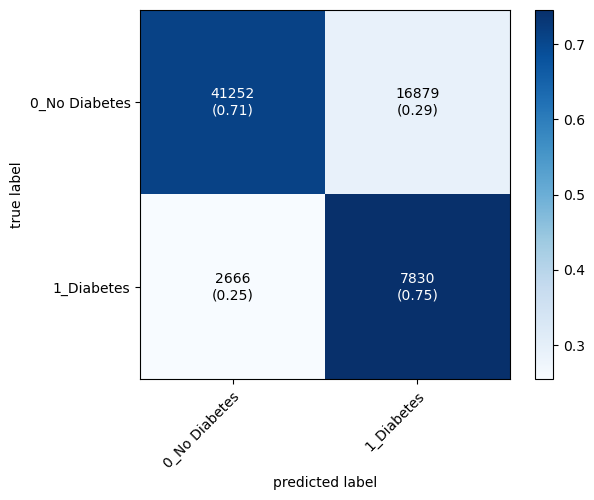

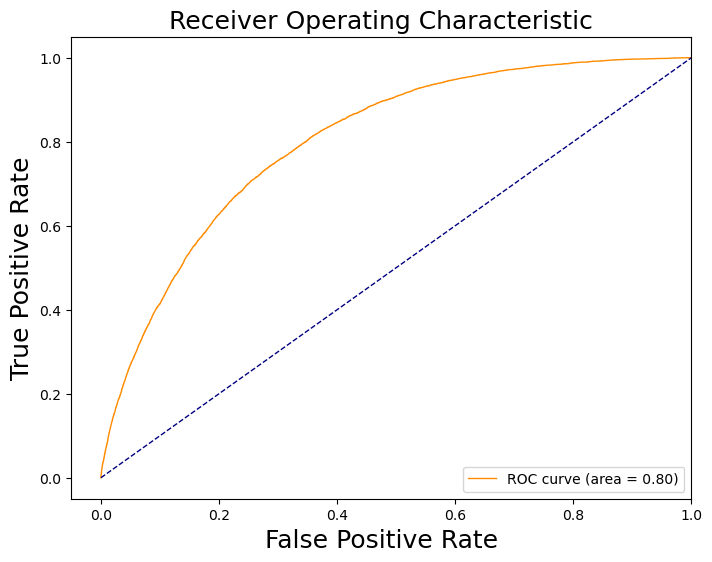

ROC AUC: 0.80


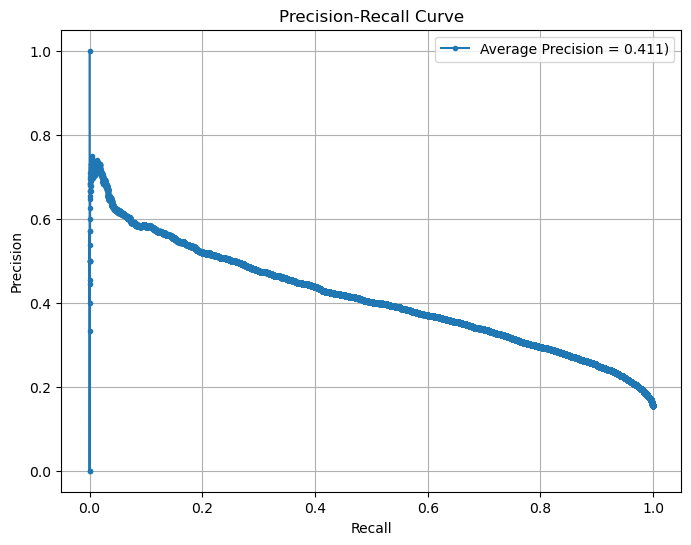


Logistic Regression with Manual Class Weights:
Cross-validation scores:  [0.72275651 0.72712796 0.73099981 0.72962593 0.72568306]
Mean Accuracy:  0.7272386541126592
Accuracy Score:  0.725457910151981
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.73      0.82     58131
         1.0       0.32      0.71      0.44     10496

    accuracy                           0.73     68627
   macro avg       0.63      0.72      0.63     68627
weighted avg       0.84      0.73      0.76     68627

Training + Prediction Runtime: 175.36 ms
Confusion Matrix:



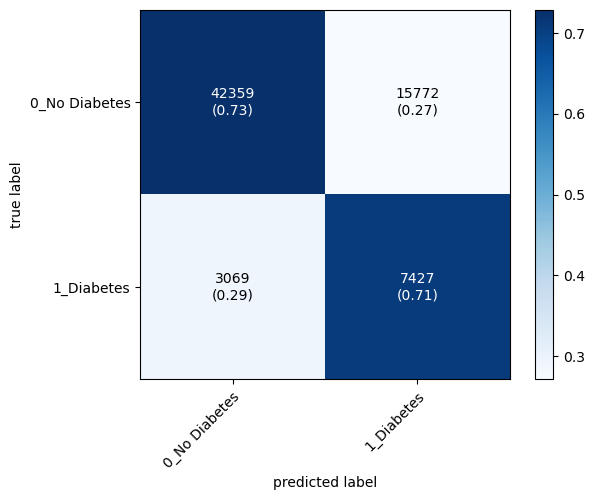

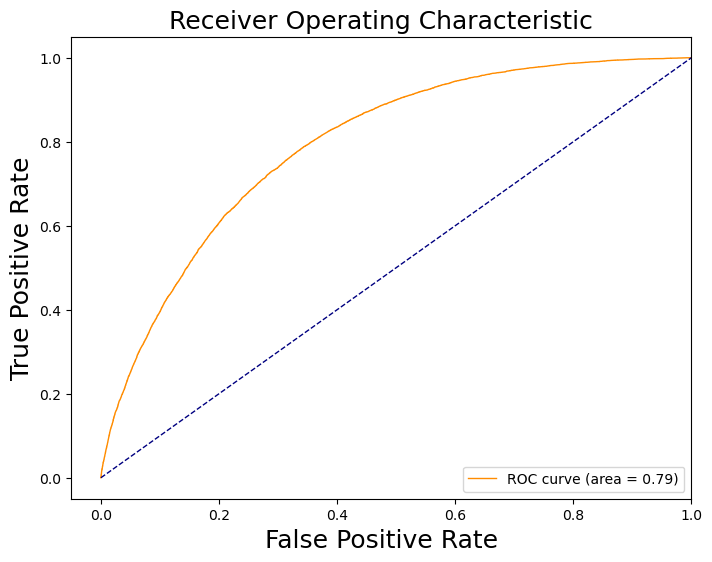

ROC AUC: 0.79


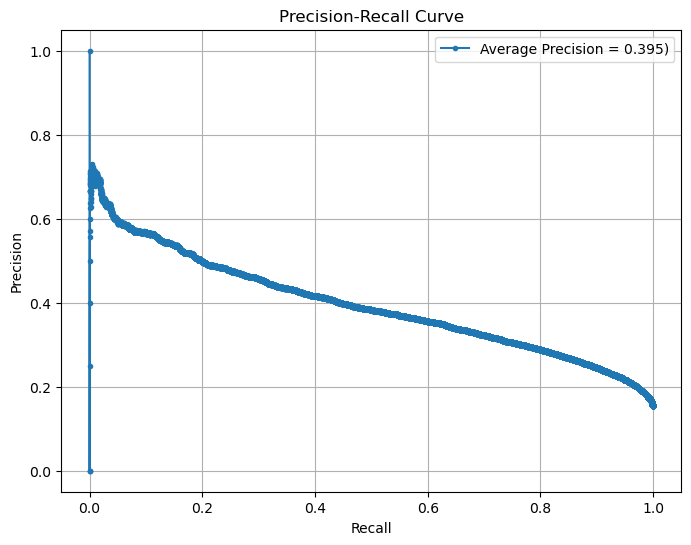

In [30]:
#Base model
print("Logistic Regression - Base model:")
evalModel(lr_base)

# Evaluate Logistic Regression model with SMOTE
print("Logistic Regression with SMOTE:")
evalModel(lr_SMOTE)

# Evaluate Logistic Regression model with class weights
print("\nLogistic Regression with Balanced Class Weights:")
evalModel(lr_ClassWeights)

# Evaluate Logistic Regression model with class weights
print("\nLogistic Regression with Manual Class Weights:")
evalModel(lr_ClassWeights_m)


Naive Bayes - Base model:
Cross-validation scores:  [0.78302005 0.78704802 0.78973334 0.78711047 0.78423107]
Mean Accuracy:  0.7862285907142289
Accuracy Score:  0.7852885890392994
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     58131
         1.0       0.35      0.49      0.41     10496

    accuracy                           0.79     68627
   macro avg       0.63      0.66      0.64     68627
weighted avg       0.82      0.79      0.80     68627

Training + Prediction Runtime: 108.96 ms
Confusion Matrix:



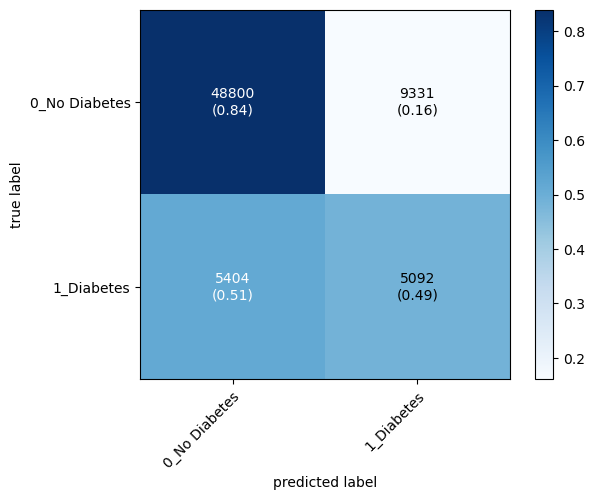

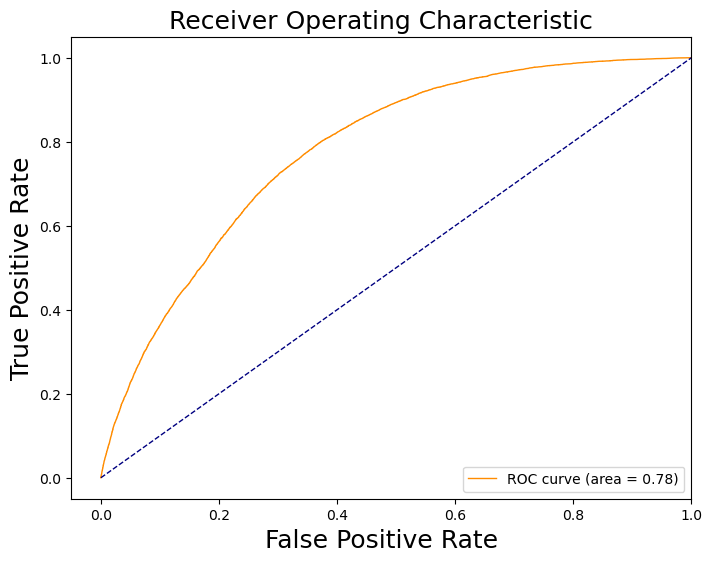

ROC AUC: 0.78


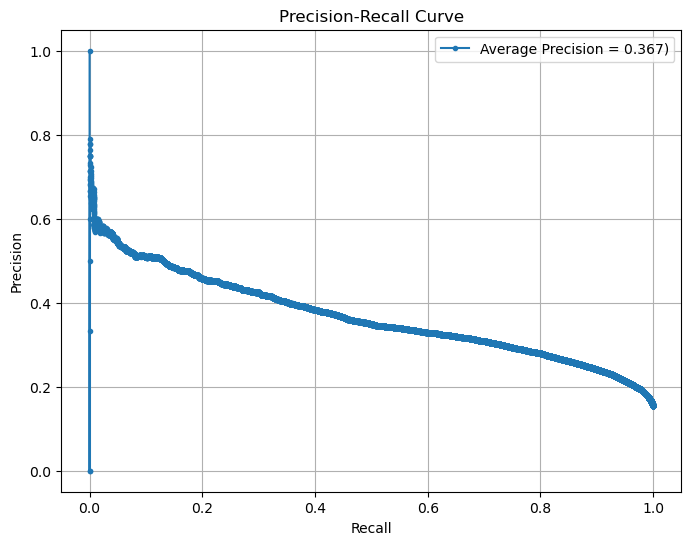


Naive Bayes with SMOTE:
Cross-validation scores:  [0.78302005 0.78704802 0.78973334 0.78711047 0.78423107]
Mean Accuracy:  0.7862285907142289
Accuracy Score:  0.7366634123595669
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.75      0.83     58131
         1.0       0.32      0.65      0.43     10496

    accuracy                           0.74     68627
   macro avg       0.62      0.70      0.63     68627
weighted avg       0.83      0.74      0.77     68627

Training + Prediction Runtime: 1182.41 ms
Confusion Matrix:



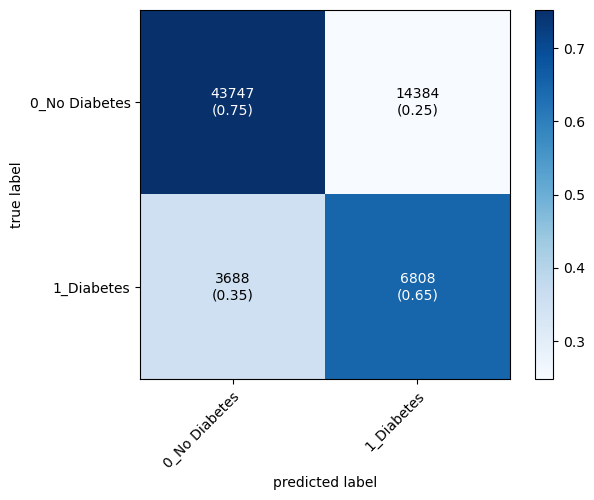

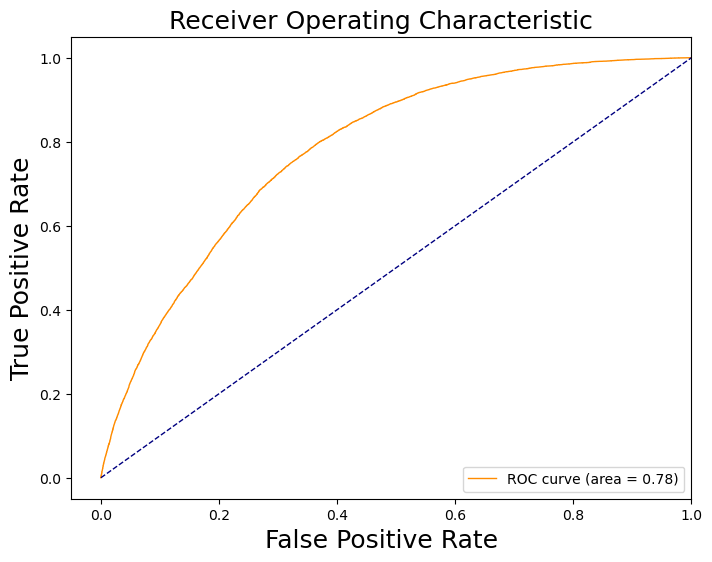

ROC AUC: 0.78


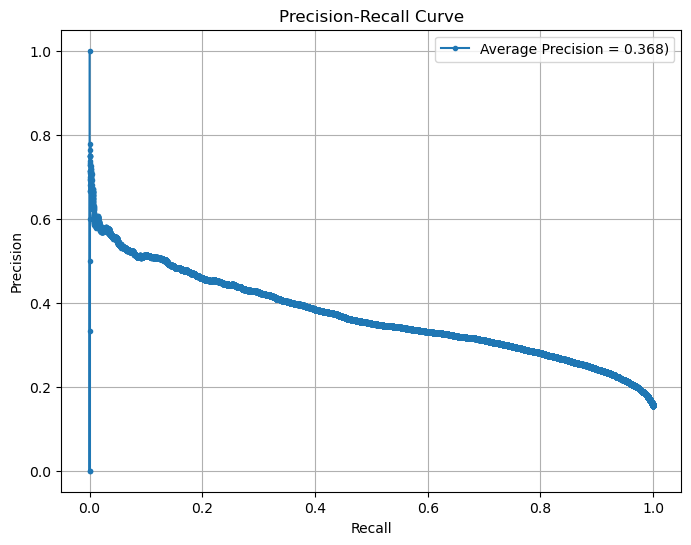


Naive Bayes with Class Weights (same as base model):
Cross-validation scores:  [0.78302005 0.78704802 0.78973334 0.78711047 0.78423107]
Mean Accuracy:  0.7862285907142289
Accuracy Score:  0.7852885890392994
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     58131
         1.0       0.35      0.49      0.41     10496

    accuracy                           0.79     68627
   macro avg       0.63      0.66      0.64     68627
weighted avg       0.82      0.79      0.80     68627

Training + Prediction Runtime: 167.21 ms
Confusion Matrix:



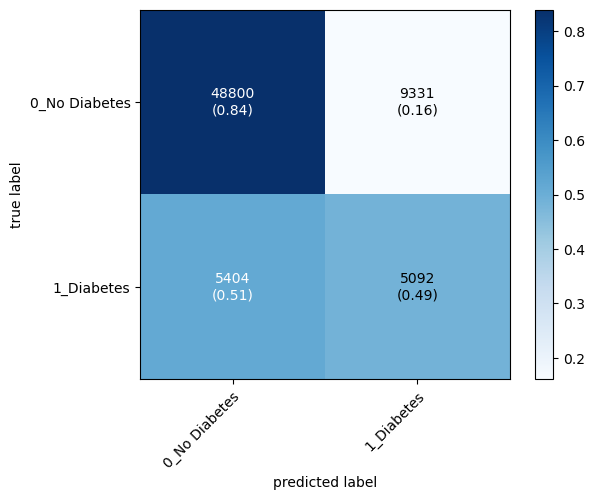

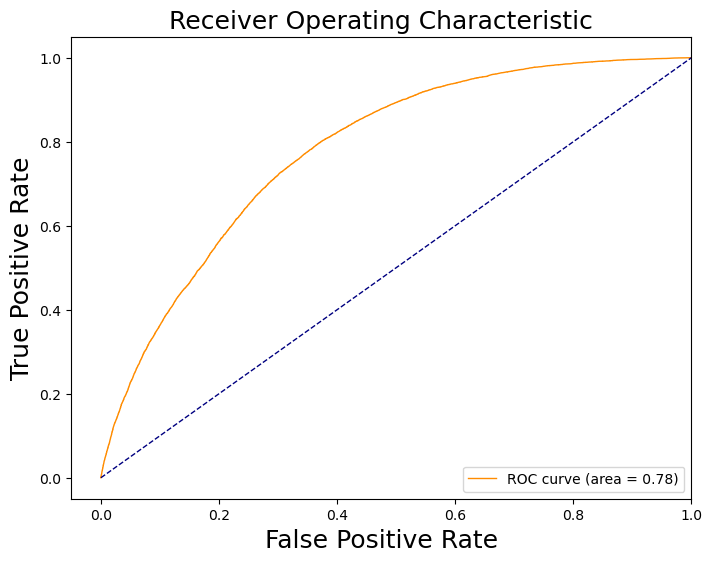

ROC AUC: 0.78


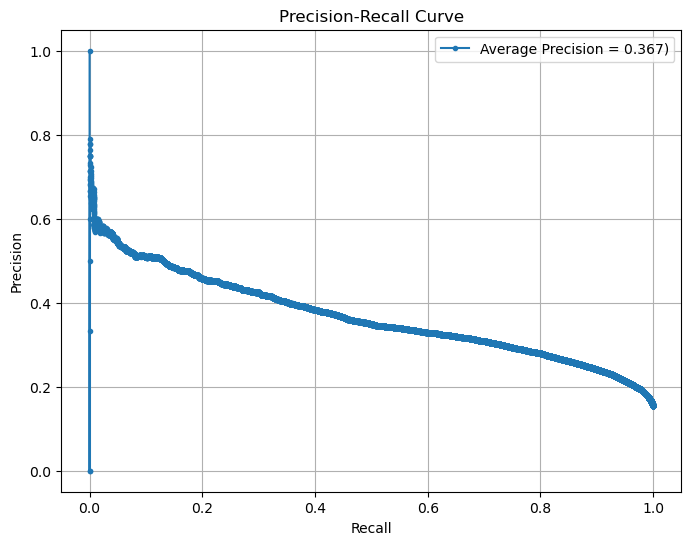


Naive Bayes with Class Weights (manually adjusted):
Cross-validation scores:  [0.78302005 0.78704802 0.78973334 0.78711047 0.78423107]
Mean Accuracy:  0.7862285907142289
Accuracy Score:  0.7852885890392994
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     58131
         1.0       0.35      0.49      0.41     10496

    accuracy                           0.79     68627
   macro avg       0.63      0.66      0.64     68627
weighted avg       0.82      0.79      0.80     68627

Training + Prediction Runtime: 166.39 ms
Confusion Matrix:



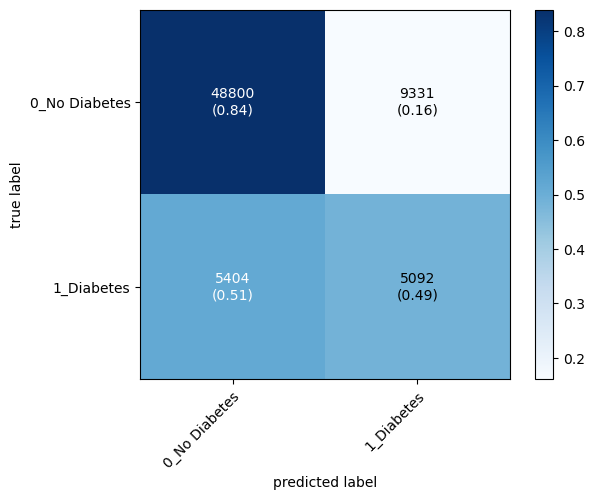

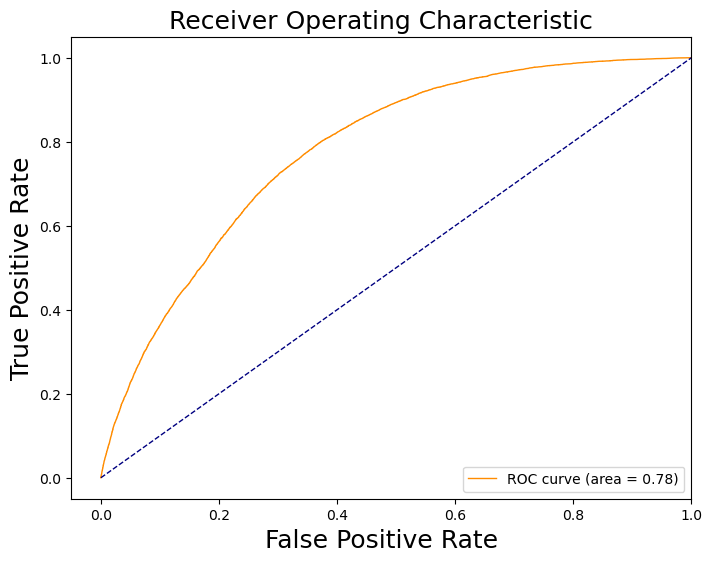

ROC AUC: 0.78


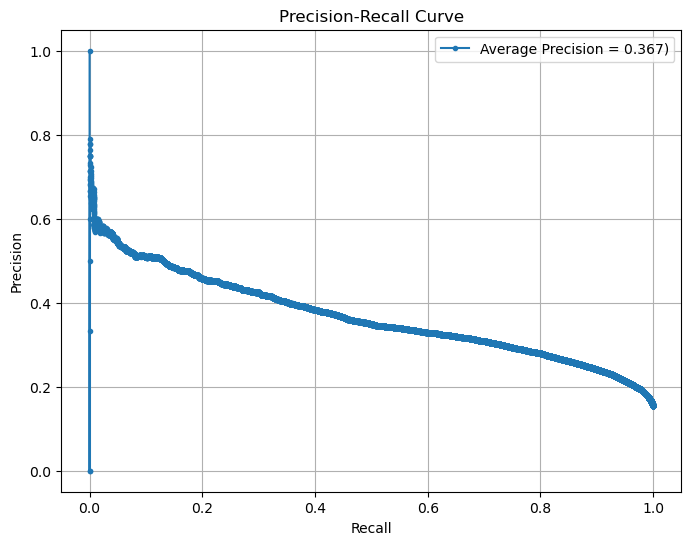

In [31]:
#Base model
print("Naive Bayes - Base model:")
evalModel(nb_base)

# Evaluate Naive Bayes model with SMOTE
print("\nNaive Bayes with SMOTE:")
evalModel(nb_SMOTE)

# Evaluate Naive Bayes model with class weights = should be the same as base model
print("\nNaive Bayes with Class Weights (same as base model):")
evalModel(nb_ClassWeights)
print("\nNaive Bayes with Class Weights (manually adjusted):")
evalModel(nb_ClassWeights_m)

Decision Tree - Base model:
Cross-validation scores:  [0.75432461 0.75435584 0.75260726 0.75838381 0.75200625]
Mean Accuracy:  0.7543355524027049
Accuracy Score:  0.7980678158742186
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     58131
         1.0       0.32      0.29      0.31     10496

    accuracy                           0.80     68627
   macro avg       0.60      0.59      0.59     68627
weighted avg       0.79      0.80      0.79     68627

Training + Prediction Runtime: 605.42 ms
Confusion Matrix:



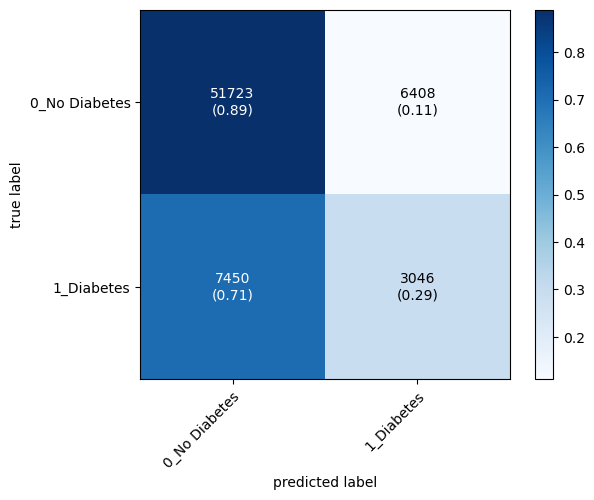

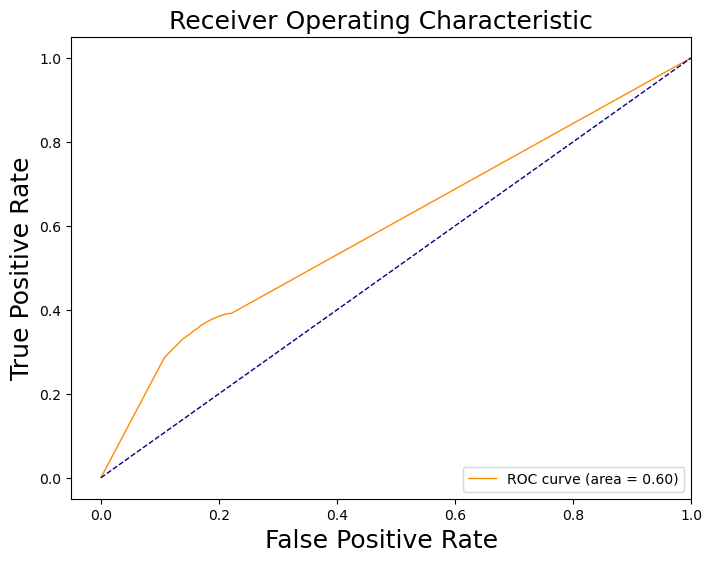

ROC AUC: 0.60


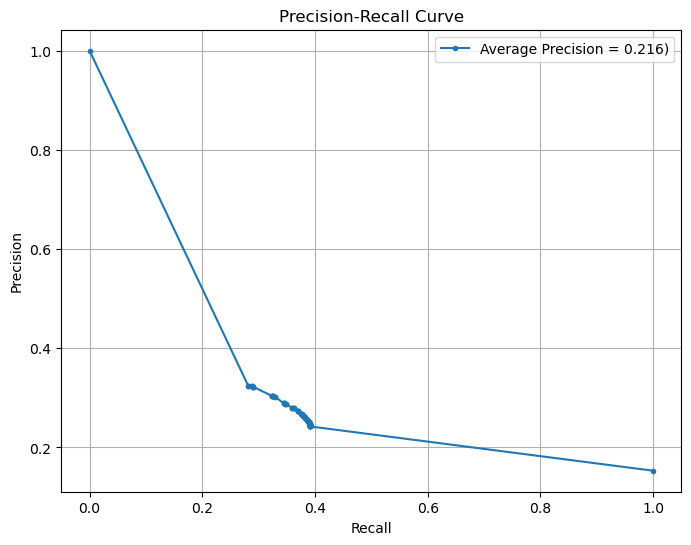


Decision Tree with SMOTE:
Cross-validation scores:  [0.75432461 0.75435584 0.75260726 0.75838381 0.75200625]
Mean Accuracy:  0.7543355524027049
Accuracy Score:  0.7933757850408731
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     58131
         1.0       0.32      0.31      0.31     10496

    accuracy                           0.79     68627
   macro avg       0.60      0.59      0.60     68627
weighted avg       0.79      0.79      0.79     68627

Training + Prediction Runtime: 2116.40 ms
Confusion Matrix:



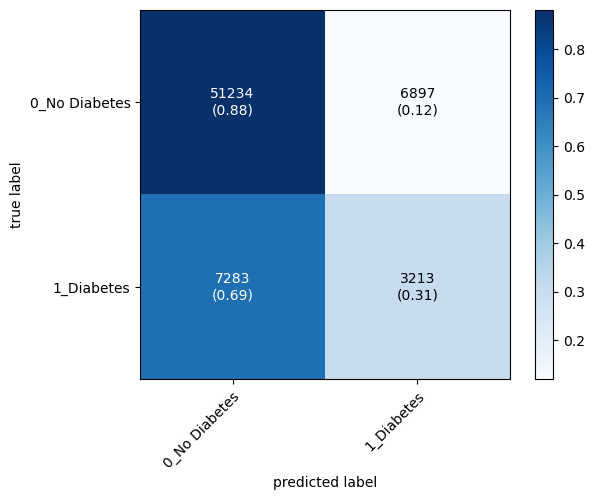

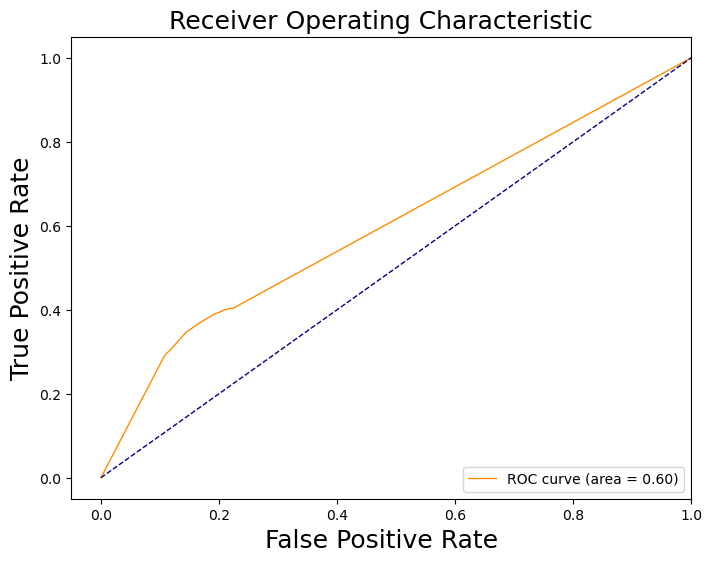

ROC AUC: 0.60


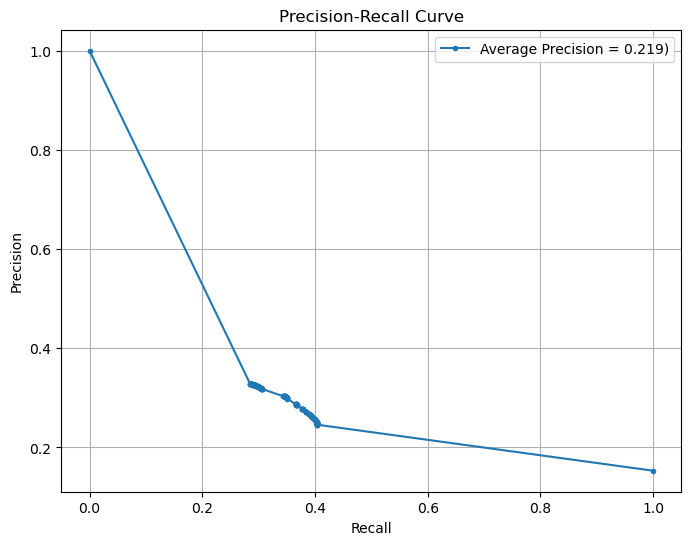


Decision Tree with Class Weights - Balanced:
Cross-validation scores:  [0.75432461 0.75435584 0.75260726 0.75838381 0.75200625]
Mean Accuracy:  0.7543355524027049
Accuracy Score:  0.7526046599734798
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85     58131
         1.0       0.26      0.35      0.30     10496

    accuracy                           0.75     68627
   macro avg       0.57      0.59      0.58     68627
weighted avg       0.78      0.75      0.77     68627

Training + Prediction Runtime: 464.57 ms
Confusion Matrix:



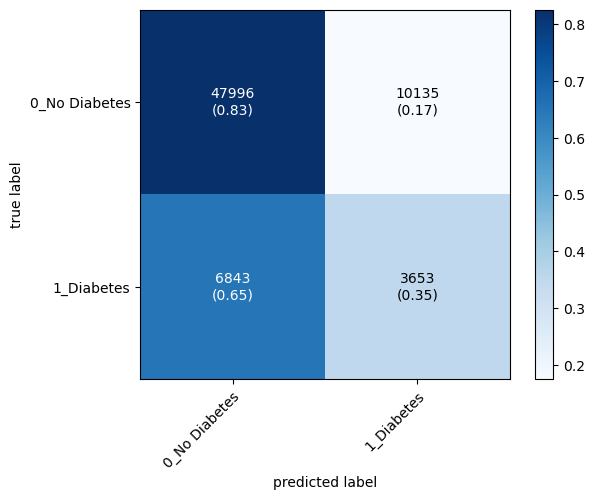

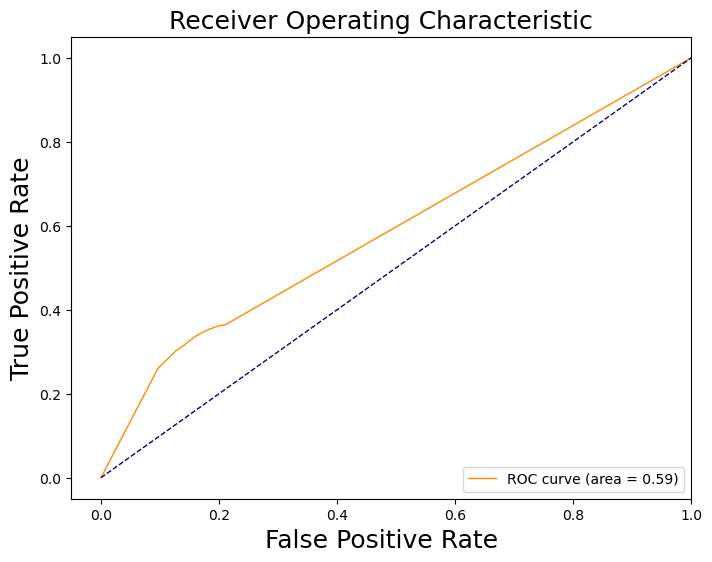

ROC AUC: 0.59


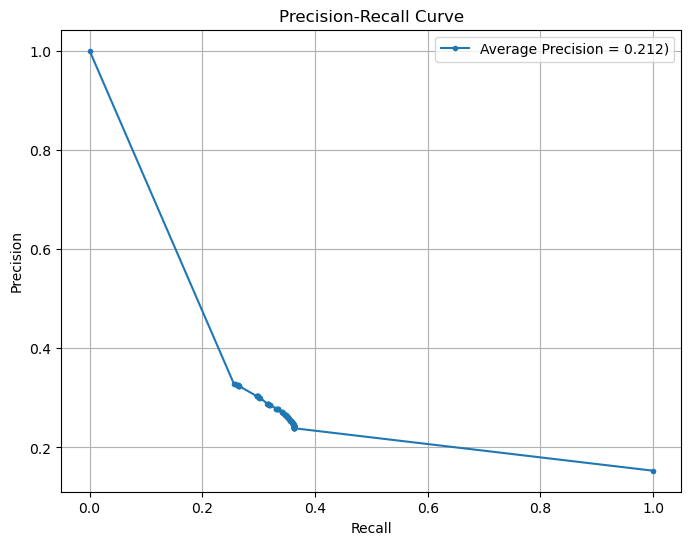


Decision Tree with Manual Class Weights:
Cross-validation scores:  [0.75432461 0.75435584 0.75260726 0.75838381 0.75200625]
Mean Accuracy:  0.7543355524027049
Accuracy Score:  0.7524589447302082
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85     58131
         1.0       0.27      0.35      0.30     10496

    accuracy                           0.75     68627
   macro avg       0.57      0.59      0.58     68627
weighted avg       0.78      0.75      0.77     68627

Training + Prediction Runtime: 482.92 ms
Confusion Matrix:



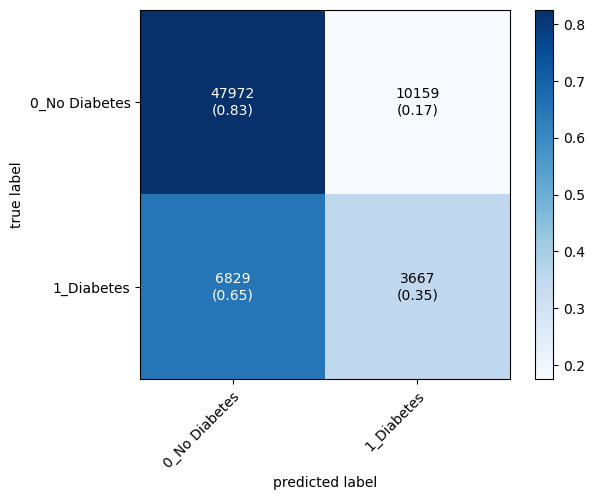

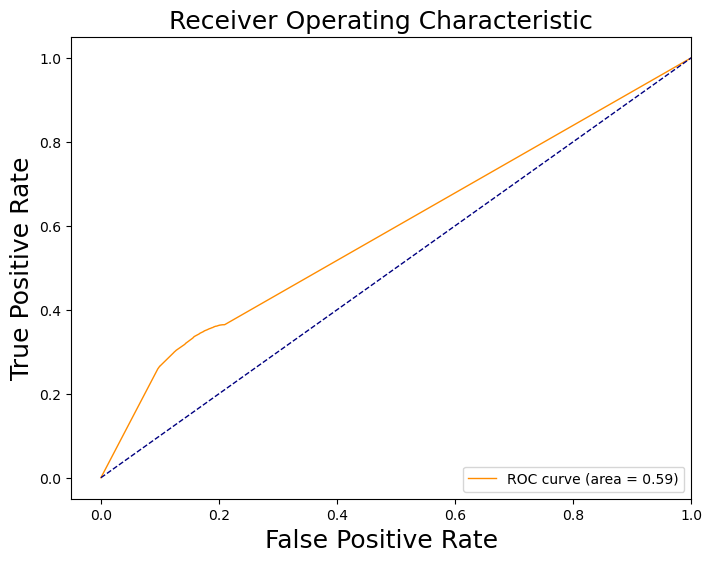

ROC AUC: 0.59


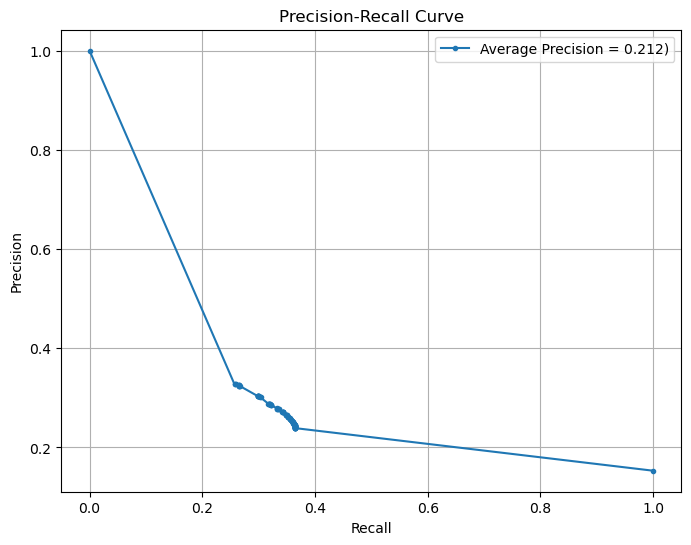

In [32]:
#Base model
print("Decision Tree - Base model:")
evalModel(dt_base)

# Evaluate Decision Tree model with SMOTE
print("\nDecision Tree with SMOTE:")
evalModel(dt_SMOTE)

# Evaluate Decision Tree model with class weights
print("\nDecision Tree with Class Weights - Balanced:")
evalModel(dt_ClassWeights)
print("\nDecision Tree with Manual Class Weights:")
evalModel(dt_ClassWeights_m)


Random Forest - Base model:


Cross-validation scores:  [0.80787485 0.81124711 0.8102167  0.81321426 0.81139735]
Mean Accuracy:  0.810790054314281
Accuracy Score:  0.8334911915135442
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     58131
         1.0       0.42      0.22      0.29     10496

    accuracy                           0.83     68627
   macro avg       0.64      0.58      0.60     68627
weighted avg       0.80      0.83      0.81     68627

Training + Prediction Runtime: 14378.17 ms
Confusion Matrix:



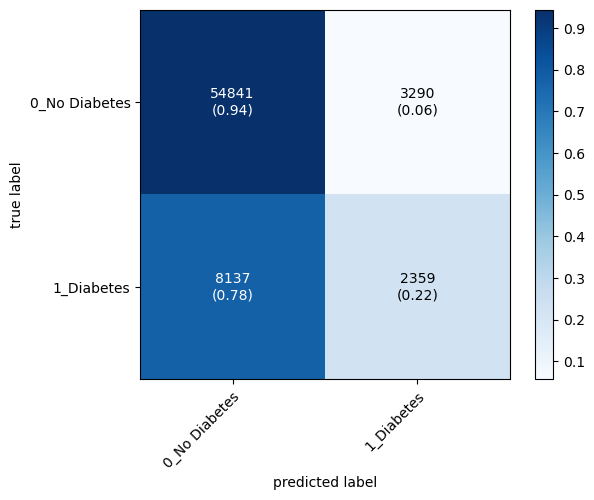

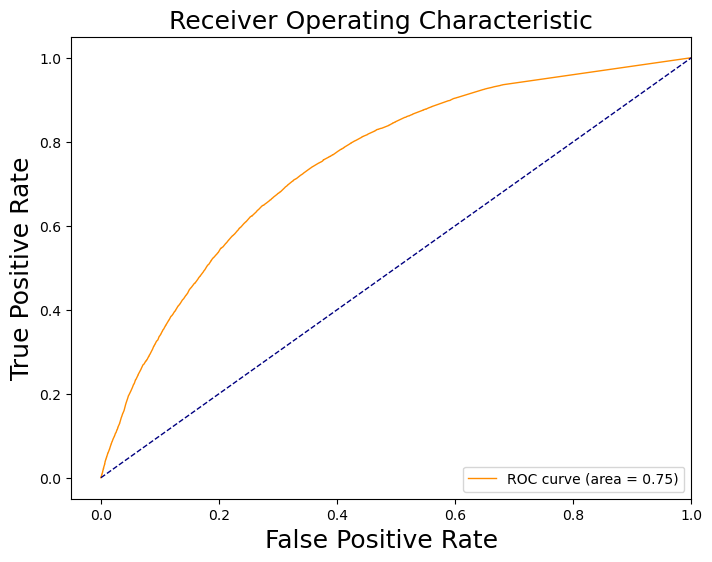

ROC AUC: 0.75


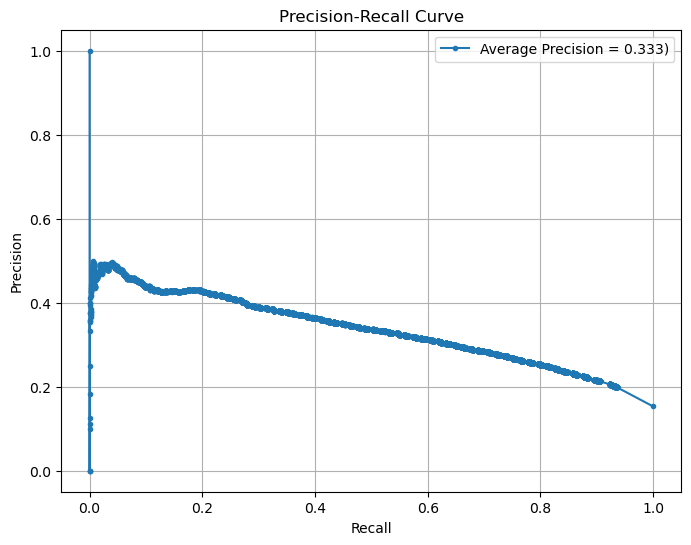


Random Forest with SMOTE:
Cross-validation scores:  [0.80787485 0.81124711 0.8102167  0.81321426 0.81139735]
Mean Accuracy:  0.810790054314281
Accuracy Score:  0.8181765194456992
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     58131
         1.0       0.38      0.30      0.34     10496

    accuracy                           0.82     68627
   macro avg       0.63      0.61      0.62     68627
weighted avg       0.80      0.82      0.81     68627

Training + Prediction Runtime: 34876.58 ms
Confusion Matrix:



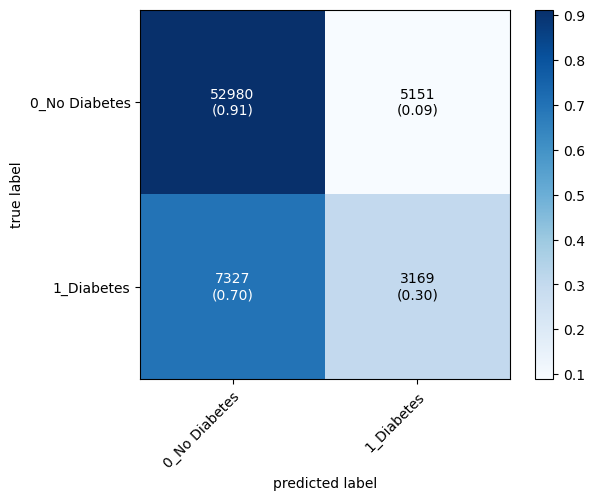

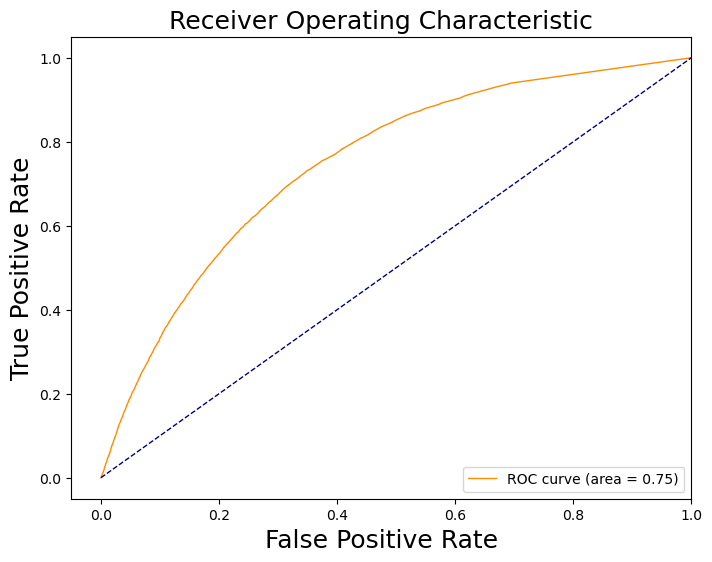

ROC AUC: 0.75


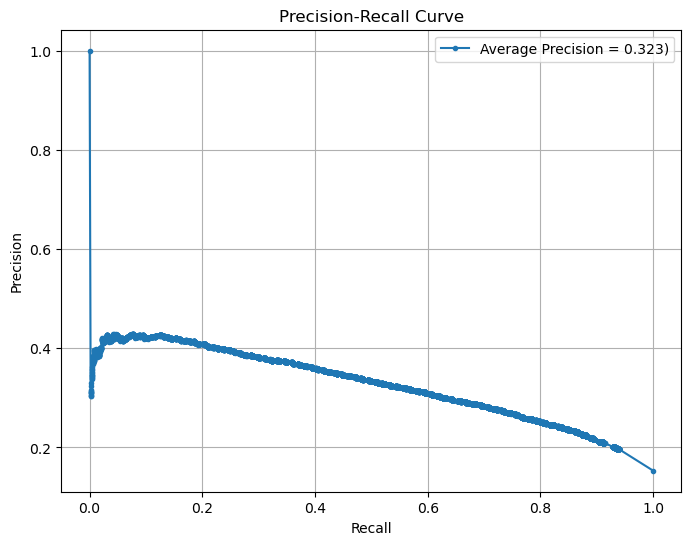


Random Forest with Class Weights - Balanced:
Cross-validation scores:  [0.80787485 0.81124711 0.8102167  0.81321426 0.81139735]
Mean Accuracy:  0.810790054314281
Accuracy Score:  0.8106721844172119
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     58131
         1.0       0.34      0.26      0.30     10496

    accuracy                           0.81     68627
   macro avg       0.61      0.58      0.59     68627
weighted avg       0.79      0.81      0.80     68627

Training + Prediction Runtime: 14107.62 ms
Confusion Matrix:



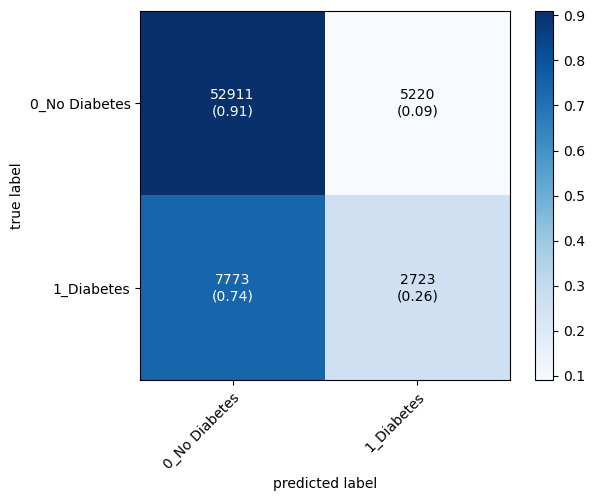

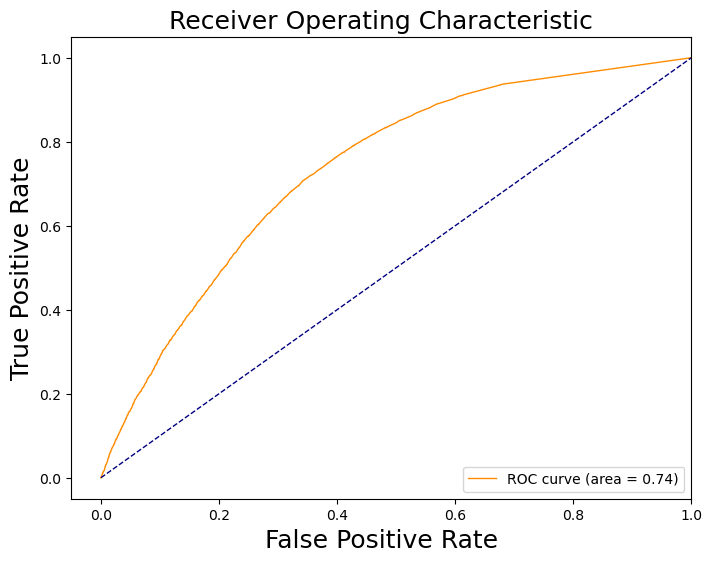

ROC AUC: 0.74


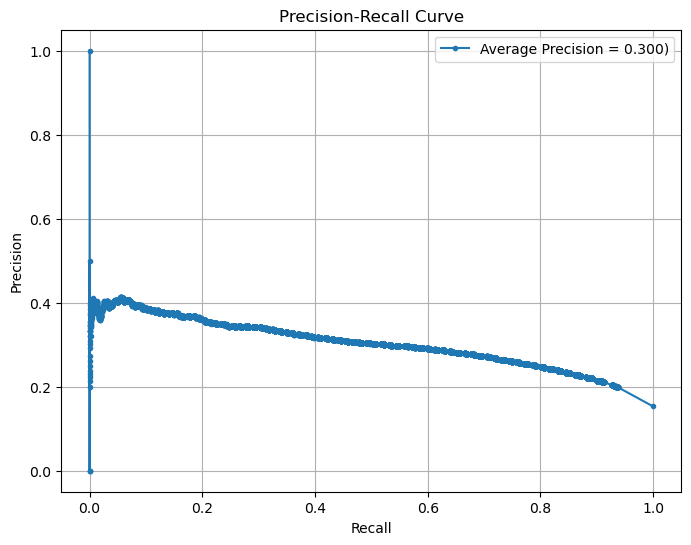


Random Forest with Manual Class Weights:
Cross-validation scores:  [0.80787485 0.81124711 0.8102167  0.81321426 0.81139735]
Mean Accuracy:  0.810790054314281
Accuracy Score:  0.8105264691739403
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     58131
         1.0       0.34      0.26      0.29     10496

    accuracy                           0.81     68627
   macro avg       0.61      0.58      0.59     68627
weighted avg       0.79      0.81      0.80     68627

Training + Prediction Runtime: 14257.54 ms
Confusion Matrix:



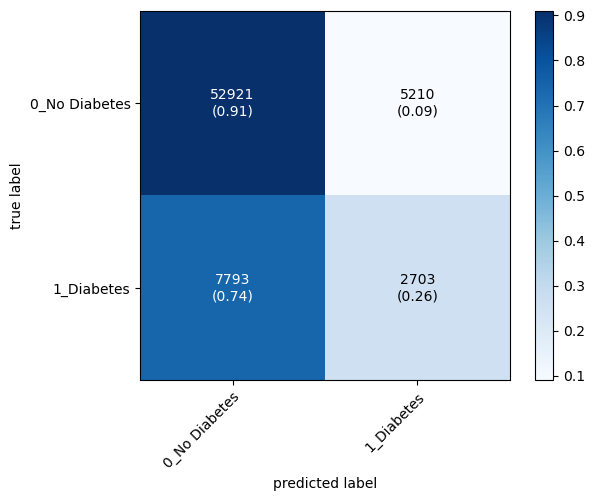

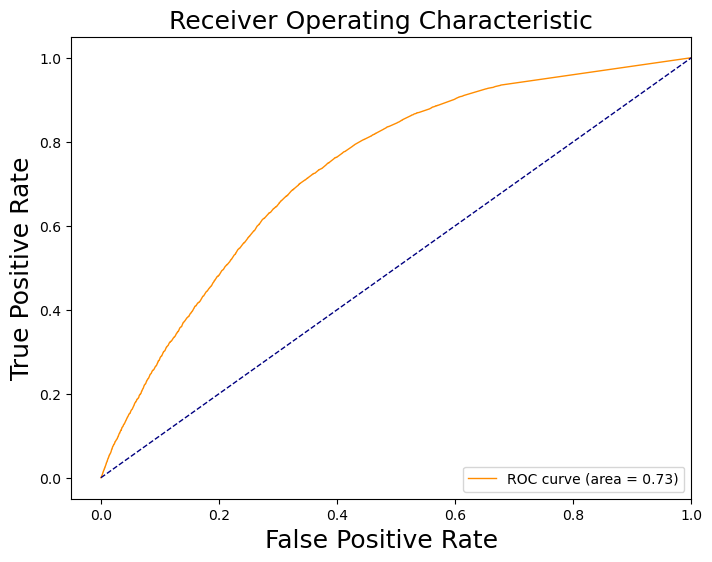

ROC AUC: 0.73


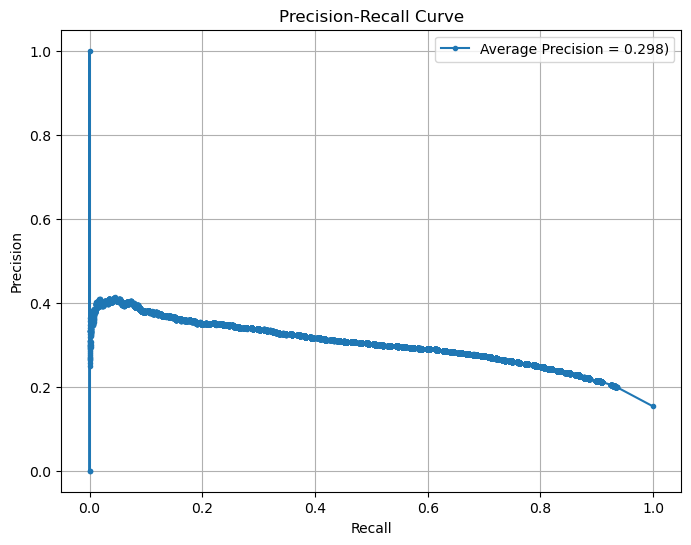

In [33]:
#Base model 
print("Random Forest - Base model:")
evalModel(rf_base)

# Evaluate Random Forest model with SMOTE
print("\nRandom Forest with SMOTE:")
evalModel(rf_SMOTE)

# Evaluate Random Forest model with class weights
print("\nRandom Forest with Class Weights - Balanced:")
evalModel(rf_ClassWeights)
print("\nRandom Forest with Manual Class Weights:")
evalModel(rf_ClassWeights_m)

### Key Findings and Model Selection Rationale

Applying SMOTE and adjusting class_weight did not significantly improve the accuracy score or ROC AUC compared to the base models, likely due to the inherent data imbalance.

However, models using SMOTE achieved overall better recall (sensitivity) / f1-score / average precision for class 1 (Prediabetes/Diabetes) than other approaches. 

Given that Recall is often a more critical metric in healthcare screening, particularly for identifying at-risk individuals, and Average Precision provides a more comprehensive view of the model's performance, the SMOTE model is preferred for further training.

**Possible Metrics to Evaluate the Models**
- Recall/Sensitivity: Best if we want to minimise the risk of missing positive cases (people with diabetes).
- Average Precision (AP): Comprehensive evaluation across all thresholds; ideal for imbalanced datasets. Summarises Precision-Recall curve.
- F1-Score: Balances precision and recall; useful for imbalanced data. Uses 0.5 threshold by default.

In [34]:
# Create a scorer that specifically targets the recall or f1-score of class 1 (Diabetes), 
#  to be used for performance evaluation / hyperparameter tuning later
recall_class1_scorer = make_scorer(recall_score, pos_label=1)
ap_class1_scorer = make_scorer(average_precision_score, needs_proba=True, pos_label=1)
f1_class1_scorer = make_scorer(f1_score, pos_label=1)

## 7. Hyperparameter Tuning

In [35]:
# GridSearch function for hyperparameter tuning

# This method would take a long time for complex models or param_grids with many combinations of parameters

def gridSearch(machModel, params, predictors, target, random_state=42):
    model = machModel    
    
    # Check if the model has a class_weight parameter
    if hasattr(model, 'class_weight') and 'class_weight' not in params:
        # Ensure class_weight is set to None - otherwise it may give strange class weight ratios
        params['class_weight'] = [None]
        model.set_params(class_weight=None)
    
    # Perform the search with the specified scoring method and automatic StratifiedKFold
    grd = GridSearchCV(model, param_grid=params, scoring=recall_class1_scorer, cv=5, n_jobs=-1)  # Add parallel processing
    grdMod = grd.fit(predictors, target)
    print(grdMod)
    print(grdMod.best_estimator_)
    print(grdMod.best_score_)
    return [grdMod.cv_results_, grdMod.best_estimator_, grdMod.best_score_]


In [36]:
# Use RandomizedSearchCV for faster process:
def randomSearch(machModel, params, predictors, target, n_iter=10):
    model = machModel
    # Check if the model has a class_weight parameter
    if hasattr(model, 'class_weight') and 'class_weight' not in params:
        # Ensure class_weight is set to None - otherwise it may give strange class weight ratios
        params['class_weight'] = [None]
        model.set_params(class_weight=None)
    # Perform the search with the specified scoring method and automatic StratifiedKFold
    rnd = RandomizedSearchCV(model, param_distributions=params, n_iter=n_iter, scoring=ap_class1_scorer, cv=5, random_state=42)
    rndMod = rnd.fit(predictors, target)
    print(rndMod)
    print(rndMod.best_estimator_)
    print(rndMod.best_score_)
    return [rndMod.cv_results_, rndMod.best_estimator_, rndMod.best_score_]

In [37]:
# Hyperparameter grids
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 1, 10, 100],
    'max_iter': [1000, 10000],
    'solver': ['liblinear', 'saga'],
}

nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 20],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_weight_fraction_leaf': [0.0, 0.01]
}

rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 7, 10, 15, 20],
    'min_samples_split': [2, 10, 20, 100],
    'min_samples_leaf': [2, 4, 8, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [38]:
# Train models using SMOTE
lr_SMOTE = clsModel_SMOTE(lr, X, y)
nb_SMOTE = clsModel_SMOTE(nb, X, y)
dt_SMOTE = clsModel_SMOTE(dt, X, y)
rf_SMOTE = clsModel_SMOTE(rf, X, y)

In [39]:
%%time
# RandomisedSearch for Logistic Regression
lrRndSearch = randomSearch(lr_SMOTE[0], lr_params, X, y)
print("Logistic Regression Best Estimator:", lrRndSearch[1])
print("Logistic Regression Best Score:", lrRndSearch[2])


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.01, 1, 10, 100],
                                        'class_weight': [None],
                                        'max_iter': [1000, 10000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42,
                   scoring=make_scorer(average_precision_score, needs_proba=True, pos_label=1))
LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
0.4120156753562451
Logistic Regression Best Estimator: LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
Logistic Regression Best Score: 0.4120156753562451
CPU times: total: 36.2 s
Wall time: 2min 47s


In [40]:
%%time
# RandomisedSearch for Naive Bayes
nbRndSearch = randomSearch(nb_SMOTE[0], nb_params, X, y)
print("Naive Bayes Best Estimator:", nbRndSearch[1])
print("Naive Bayes Best Score:", nbRndSearch[2])

RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': [1e-09, 1e-08, 1e-07,
                                                          1e-06, 1e-05,
                                                          0.0001]},
                   random_state=42,
                   scoring=make_scorer(average_precision_score, needs_proba=True, pos_label=1))
GaussianNB(var_smoothing=0.0001)
0.37088167681468354
Naive Bayes Best Estimator: GaussianNB(var_smoothing=0.0001)
Naive Bayes Best Score: 0.37088167681468354
CPU times: total: 484 ms
Wall time: 2.63 s


In [41]:
%%time
# RandomisedSearch for Decision Tree
dtRndSearch = randomSearch(dt_SMOTE[0], dt_params, X, y)
print("Decision Tree Best Estimator:", dtRndSearch[1])
print("Decision Tree Best Score:", dtRndSearch[2])

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'class_weight': [None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [2, 10, 20, 50],
                                        'min_weight_fraction_leaf': [0.0,
                                                                     0.01]},
                   random_state=42,
                   scoring=make_scorer(average_precision_score, needs_proba=True, pos_label=1))
DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=20,
                       min_samples_split=50, random_state=4

In [42]:
%%time
# RandomisedSearch for Random Forest
rfRndSearch = randomSearch(rf_SMOTE[0], rf_params, X, y)
print("Random Forest Best Estimator:", rfRndSearch[1])
print("Random Forest Best Score:", rfRndSearch[2])

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': [None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 8, 15],
                                        'min_samples_split': [2, 10, 20, 100],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42,
                   scoring=make_scorer(average_precision_score, needs_proba=True, pos_label=1))
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=15,
                       n_estimators=200, random_state=42)
0.4265383558463867
Random Forest Best Estimator: RandomForestClassifier(cr

In [43]:
# Create models with hyperparameter tuning by randomised search - manual records

lr_hyper = LogisticRegression(C=100, max_iter=10000, random_state=42, solver='liblinear')
nb_hyper = GaussianNB(var_smoothing=1e-06)
dt_hyper = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=42)
rf_hyper = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=4, n_estimators=10, random_state=42)


In [44]:
# Hyperparameter tuning - using the Best Estimator from the RandomizedSearch
lr_hyper = lrRndSearch[1]
nb_hyper = nbRndSearch[1]
dt_hyper = dtRndSearch[1]
rf_hyper = rfRndSearch[1]

In [45]:
# Train models with updated hyperparams
lr_SMOTE_hyper = clsModel_SMOTE(lr_hyper, X, y)
nb_SMOTE_hyper = clsModel_SMOTE(nb_hyper, X, y)
dt_SMOTE_hyper = clsModel_SMOTE(dt_hyper, X, y)
rf_SMOTE_hyper = clsModel_SMOTE(rf_hyper, X, y)

Logistic Regression with Hyperparameter Tuning:
Cross-validation scores:  [0.84968463 0.85190158 0.85155811 0.85143321 0.85142857]
Mean Accuracy:  0.8512012204369664
Accuracy Score:  0.716438136593469
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     58131
         1.0       0.32      0.74      0.45     10496

    accuracy                           0.72     68627
   macro avg       0.63      0.73      0.63     68627
weighted avg       0.84      0.72      0.75     68627

Training + Prediction Runtime: 1830.36 ms
Confusion Matrix:



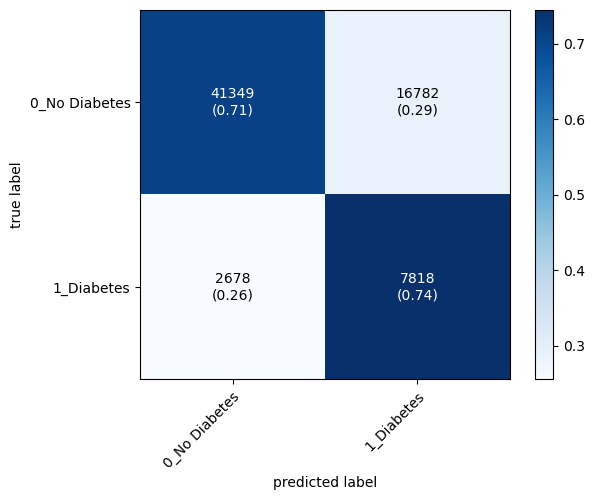

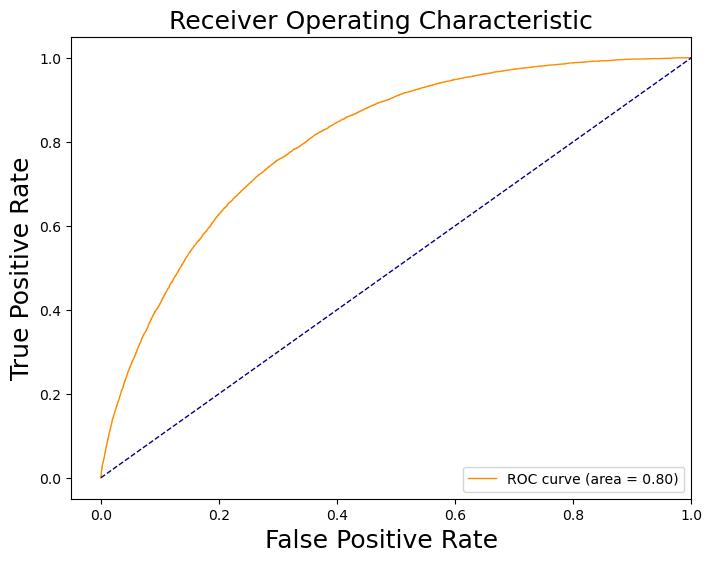

ROC AUC: 0.80


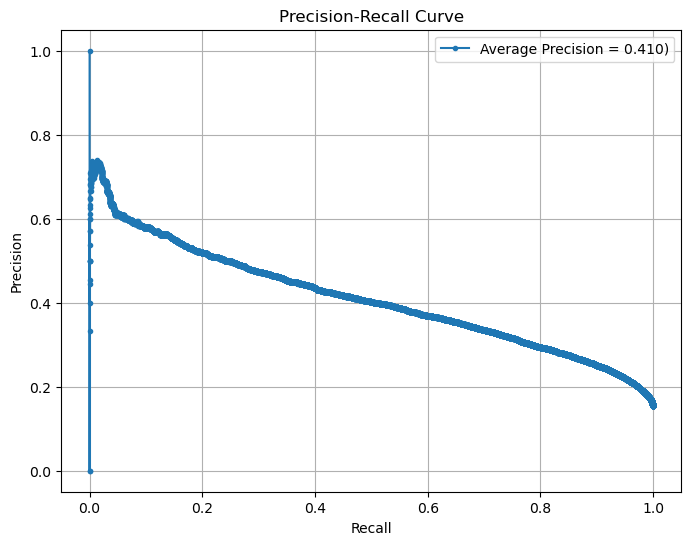

CPU times: total: 375 ms
Wall time: 1.22 s


In [46]:
%%time
print("Logistic Regression with Hyperparameter Tuning:")
evalModel(lr_SMOTE_hyper)


Naive Bayes with Hyperparameter Tuning:
Cross-validation scores:  [0.78302005 0.78704802 0.78973334 0.78711047 0.78423107]
Mean Accuracy:  0.7862285907142289
Accuracy Score:  0.7366488408352397
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.75      0.83     58131
         1.0       0.32      0.65      0.43     10496

    accuracy                           0.74     68627
   macro avg       0.62      0.70      0.63     68627
weighted avg       0.83      0.74      0.77     68627

Training + Prediction Runtime: 1399.47 ms
Confusion Matrix:



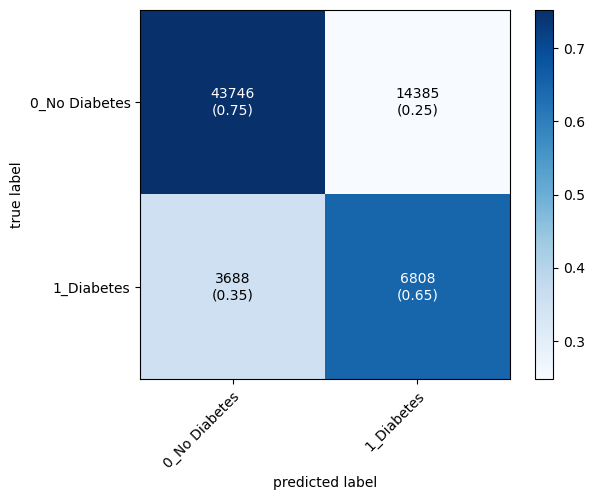

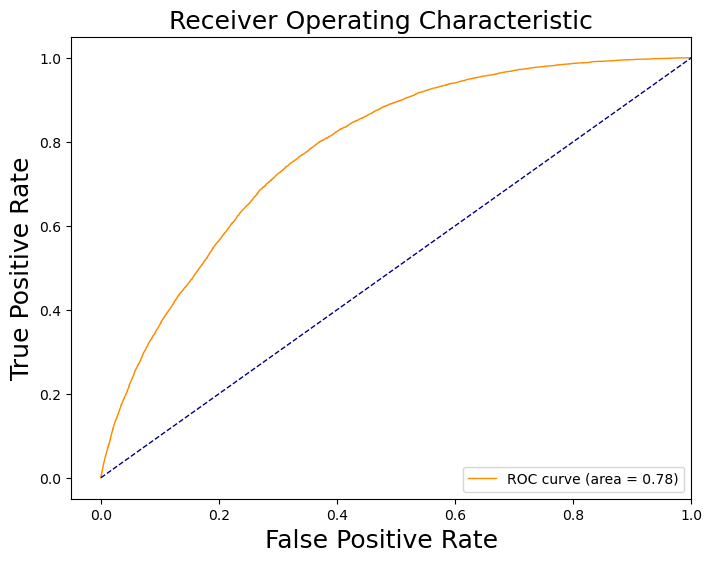

ROC AUC: 0.78


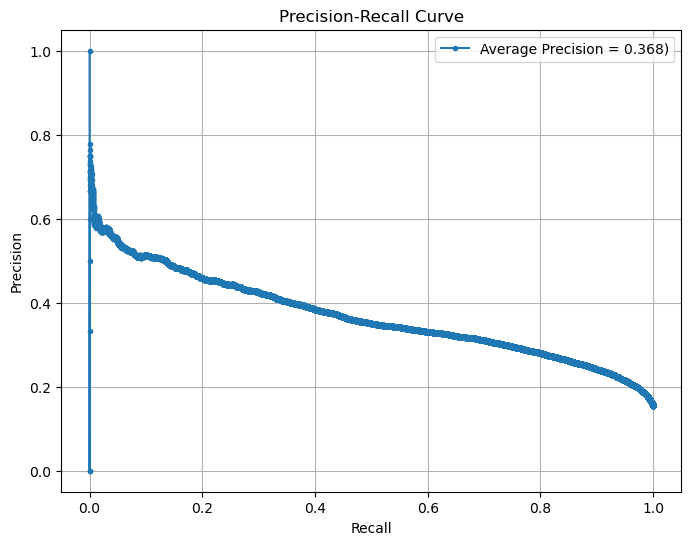

CPU times: total: 250 ms
Wall time: 675 ms


In [47]:
%%time
print("Naive Bayes with Hyperparameter Tuning:")
evalModel(nb_SMOTE_hyper)


Decision Tree with Hyperparameter Tuning:
Cross-validation scores:  [0.84862299 0.84896646 0.85034035 0.85049647 0.85005464]
Mean Accuracy:  0.8496961846914683
Accuracy Score:  0.7286782170282833
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.74      0.82     58131
         1.0       0.32      0.68      0.43     10496

    accuracy                           0.73     68627
   macro avg       0.62      0.71      0.63     68627
weighted avg       0.83      0.73      0.76     68627

Training + Prediction Runtime: 1347.81 ms
Confusion Matrix:



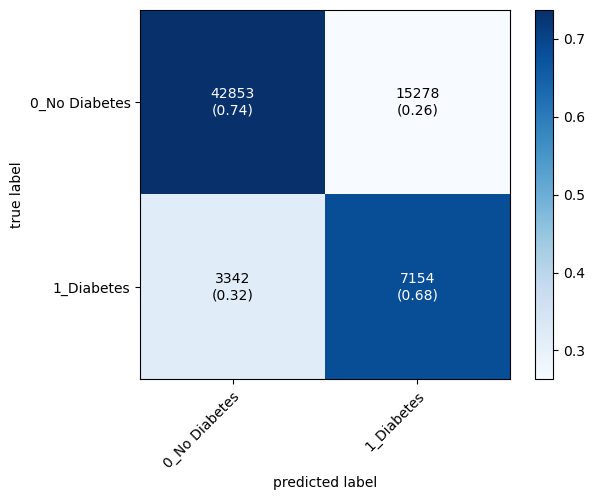

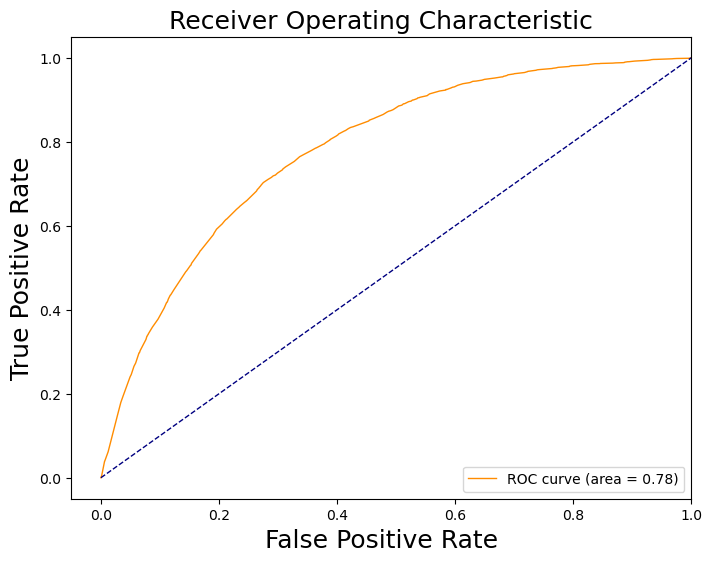

ROC AUC: 0.78


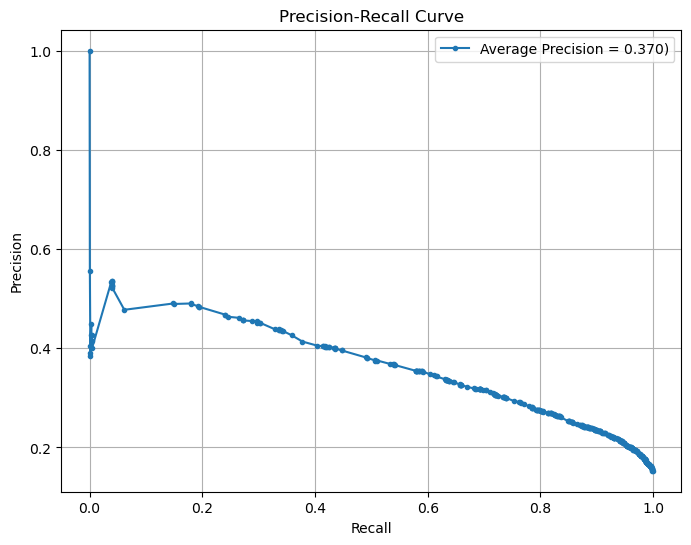

CPU times: total: 328 ms
Wall time: 757 ms


In [48]:
%%time
print("Decision Tree with Hyperparameter Tuning:")
evalModel(dt_SMOTE_hyper)


Random Forest with Hyperparameter Tuning:
Cross-validation scores:  [0.85077749 0.85236995 0.85274464 0.85158933 0.85311475]
Mean Accuracy:  0.8521192350887036
Accuracy Score:  0.7420840194092704
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.75      0.83     58131
         1.0       0.33      0.70      0.45     10496

    accuracy                           0.74     68627
   macro avg       0.63      0.72      0.64     68627
weighted avg       0.84      0.74      0.77     68627

Training + Prediction Runtime: 42067.51 ms
Confusion Matrix:



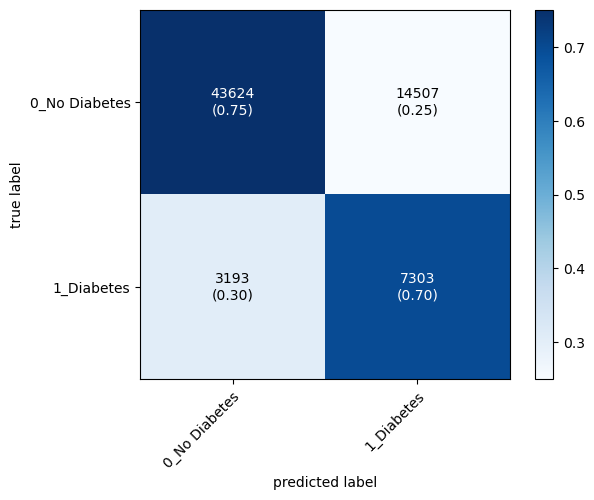

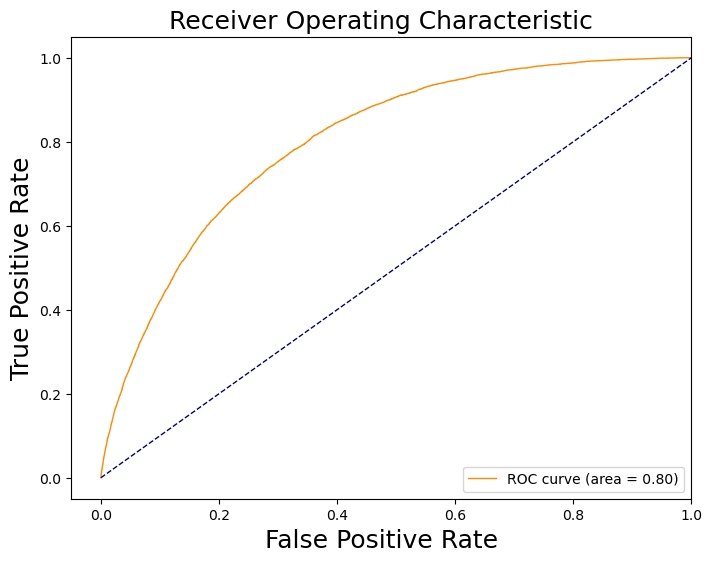

ROC AUC: 0.80


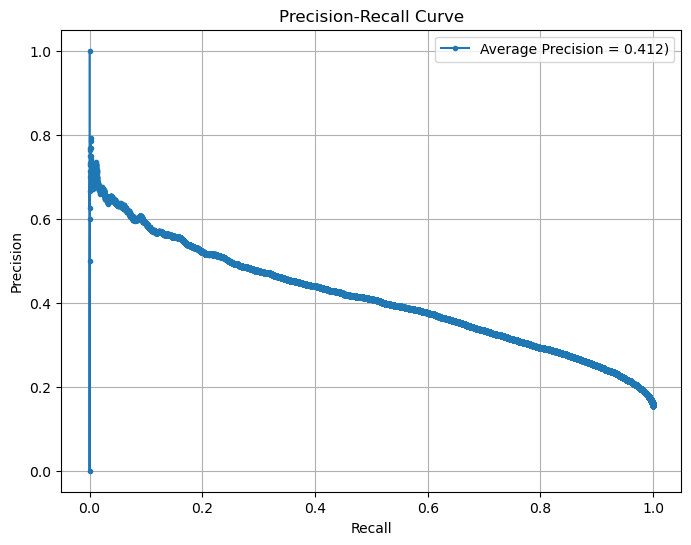

CPU times: total: 4.98 s
Wall time: 43.6 s


In [49]:
%%time
print("Random Forest with Hyperparameter Tuning:")
evalModel(rf_SMOTE_hyper)


### Precision-Recall Curve

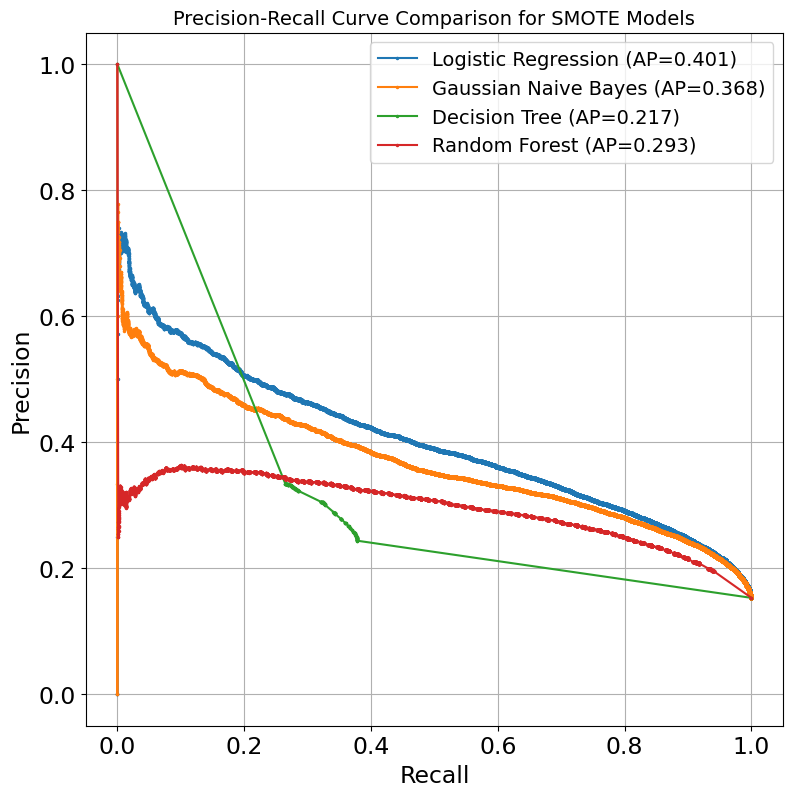

In [89]:
''' Refs:
clsModel = machMod[0]
clsModel = machMod[0]
X_train_scaled = machMod[1]
y_train = machMod[3]
y_test = machMod[4]
y_pred_class = machMod[6]
y_pred_proba = machMod[7]
accScore = machMod[8]
runtime = machMod[9]
'''
# List of SMOTE models to compare
models_sm = {
    'Logistic Regression': lr_SMOTE,
    'Gaussian Naive Bayes': nb_SMOTE,
    'Decision Tree': dt_SMOTE,
    'Random Forest': rf_SMOTE
}

# Plot Precision-Recall curve for each model
plt.figure(figsize=(9,9))

for model_name, model in models_sm.items():
    y_test = model[4]
    y_pred_proba = model[7]
    y_scores = model[7][:, 1] # Get predicted probabilities for class 1 (Diabetes)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap = average_precision_score(y_test, y_scores)
    plt.plot(recall, precision, marker='.', markersize=3, label=f'{model_name} (AP={ap:.3f})')

# Plot configuration
plt.title('Precision-Recall Curve Comparison for SMOTE Models', fontsize=14)
plt.xlabel('Recall', fontsize=17)
plt.ylabel('Precision', fontsize=17)
plt.grid(True)
plt.legend(loc="upper right", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.show()


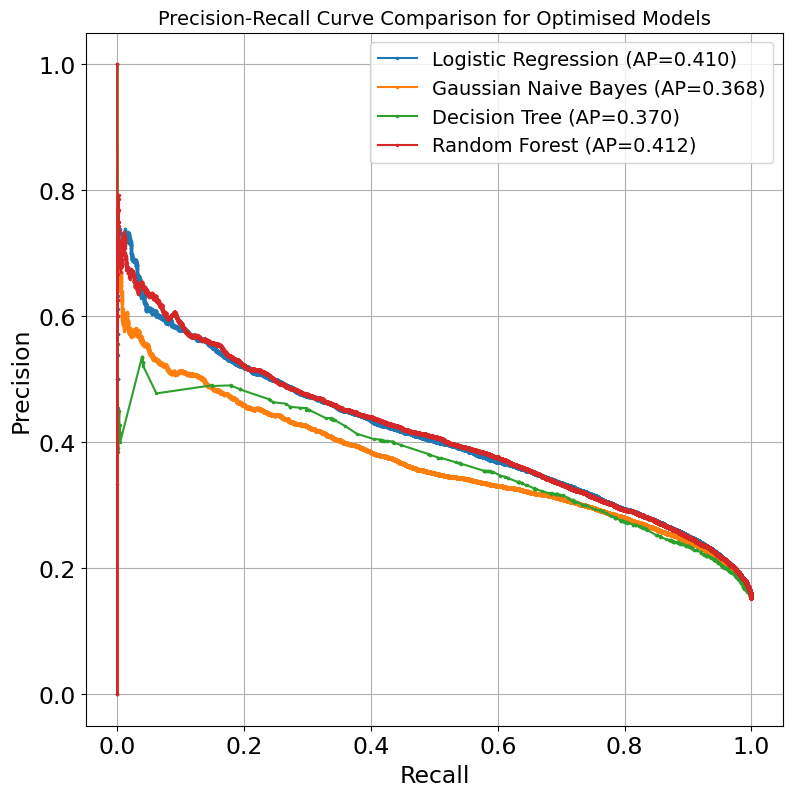

In [ ]:
'''
Refs:
clsModel = machMod[0]
X_train_scaled = machMod[1]
y_train = machMod[3]
y_test = machMod[4]
y_pred_class = machMod[6]
y_pred_proba = machMod[7]
accScore = machMod[8]
runtime = machMod[9]
'''
# List of models (trained previously) to compare
models = {
    'Logistic Regression': lr_SMOTE_hyper,
    'Gaussian Naive Bayes': nb_SMOTE_hyper,
    'Decision Tree': dt_SMOTE_hyper,
    'Random Forest': rf_SMOTE_hyper
}

# Plot Precision-Recall curve for each model
plt.figure(figsize=(9,9))

for model_name, model in models.items():
    y_test = model[4]
    y_pred_proba = model[7]
    y_scores = model[7][:, 1] # Get predicted probabilities for class 1 (Diabetes)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap = average_precision_score(y_test, y_scores)
    plt.plot(recall, precision, marker='.', markersize=3, label=f'{model_name} (AP={ap:.3f})')

# Plot configuration
plt.title('Precision-Recall Curve Comparison for Optimised Models', fontsize=14)
plt.xlabel('Recall', fontsize=17)
plt.ylabel('Precision', fontsize=17)
plt.grid(True)
plt.legend(loc="upper right", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.show()


### -

## Learning Curve

In [51]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring=None
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or a scorer callable object / function 
        with signature scorer(estimator, X, y). 
        For classification: Can use 'recall' or 'f1' (for a specific class of the target) instead of accuracy
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring  
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

### Note:

By default, the learning curves display accuracy scores for classification problems.

We can customise the scoring metric evaluate the model (like F1-score, recall, etc.) to suit our dataset


### Use Accuracy (default setting) as the scoring

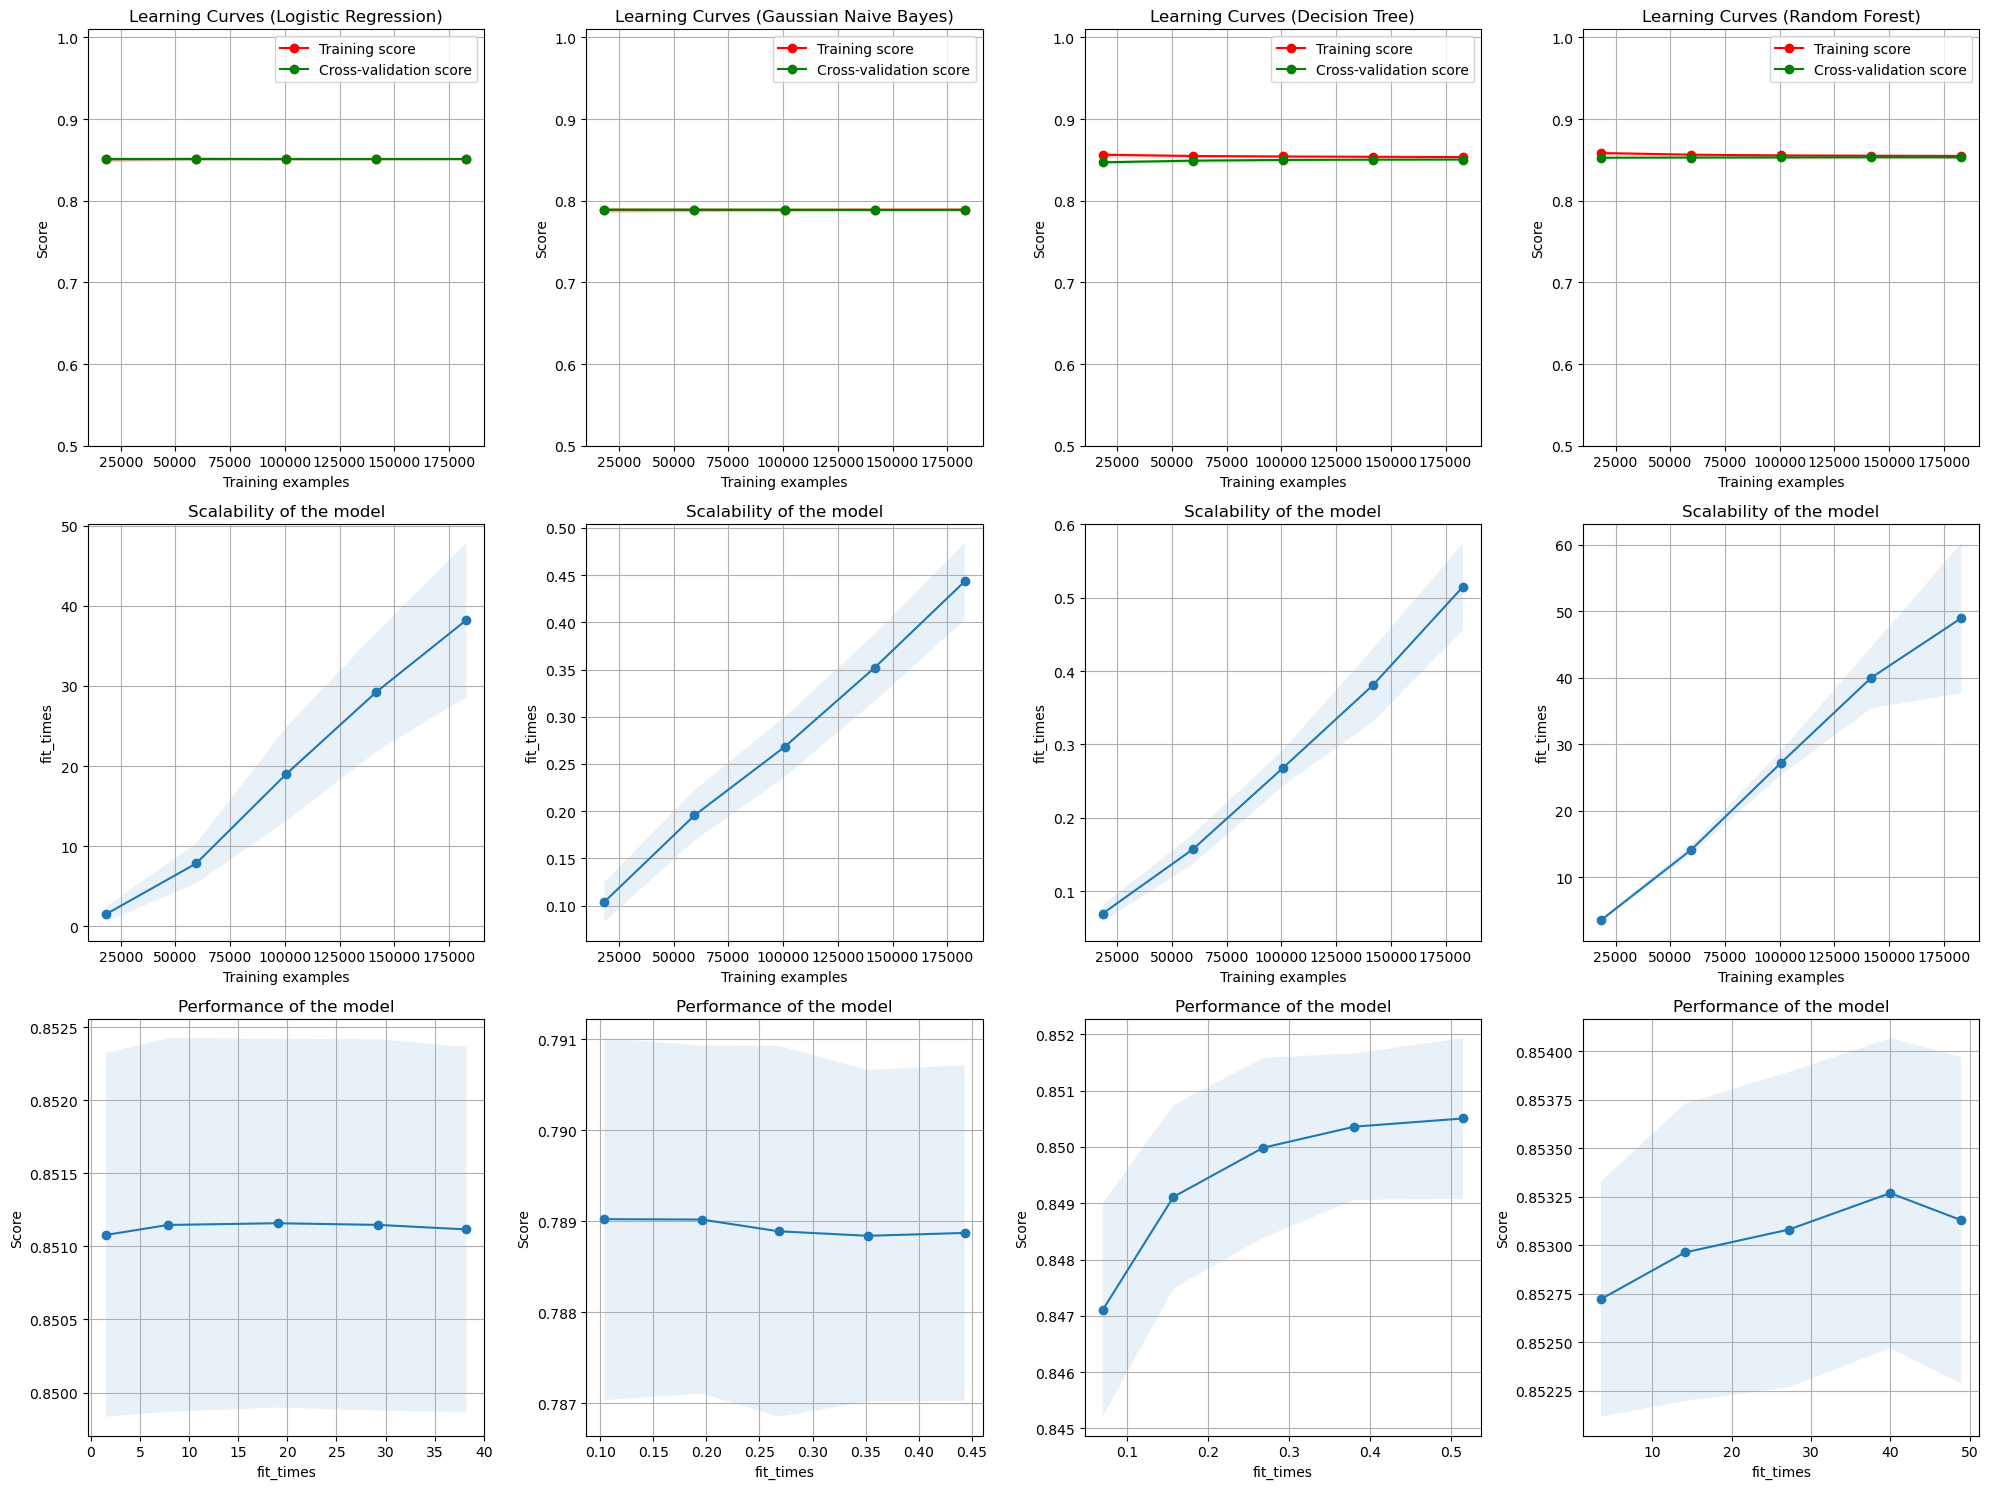

CPU times: total: 4.64 s
Wall time: 8min 41s


In [52]:
%%time
# Set up the plot grid
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Define titles, models, and custom cross-validation strategies
models = {
    'Learning Curves (Logistic Regression)': {
        'model': lr_SMOTE_hyper[0],  # Accessing the trained model from the first element of the list
        'cv': ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    },
    'Learning Curves (Gaussian Naive Bayes)': {
        'model': nb_SMOTE_hyper[0],  # Accessing the trained model
        'cv': ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    },
    'Learning Curves (Decision Tree)': {
        'model': dt_SMOTE_hyper[0],  # Accessing the trained model
        'cv': ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    },
    'Learning Curves (Random Forest)': {
        'model': rf_SMOTE_hyper[0],  # Accessing the trained model
        'cv': ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # Smaller n_splits as this model takes longer time
    }
}

# Plot learning curves for each model with their respective CV strategies
for i, (title, config) in enumerate(models.items()):
    # Extract the model and cross-validation strategy
    model = config['model']
    cv = config['cv']
    
    # Call the plot_learning_curve function
    plot_learning_curve(
        model,
        title,
        X,
        y,
        axes=axes[:, i],  # Plot on the respective subplot column
        ylim=(0.5, 1.01),
        cv=cv,        
        n_jobs=-1  # Use all available processors
    )

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Use Average Precision for Class 1 (Diabetes) as the scoring

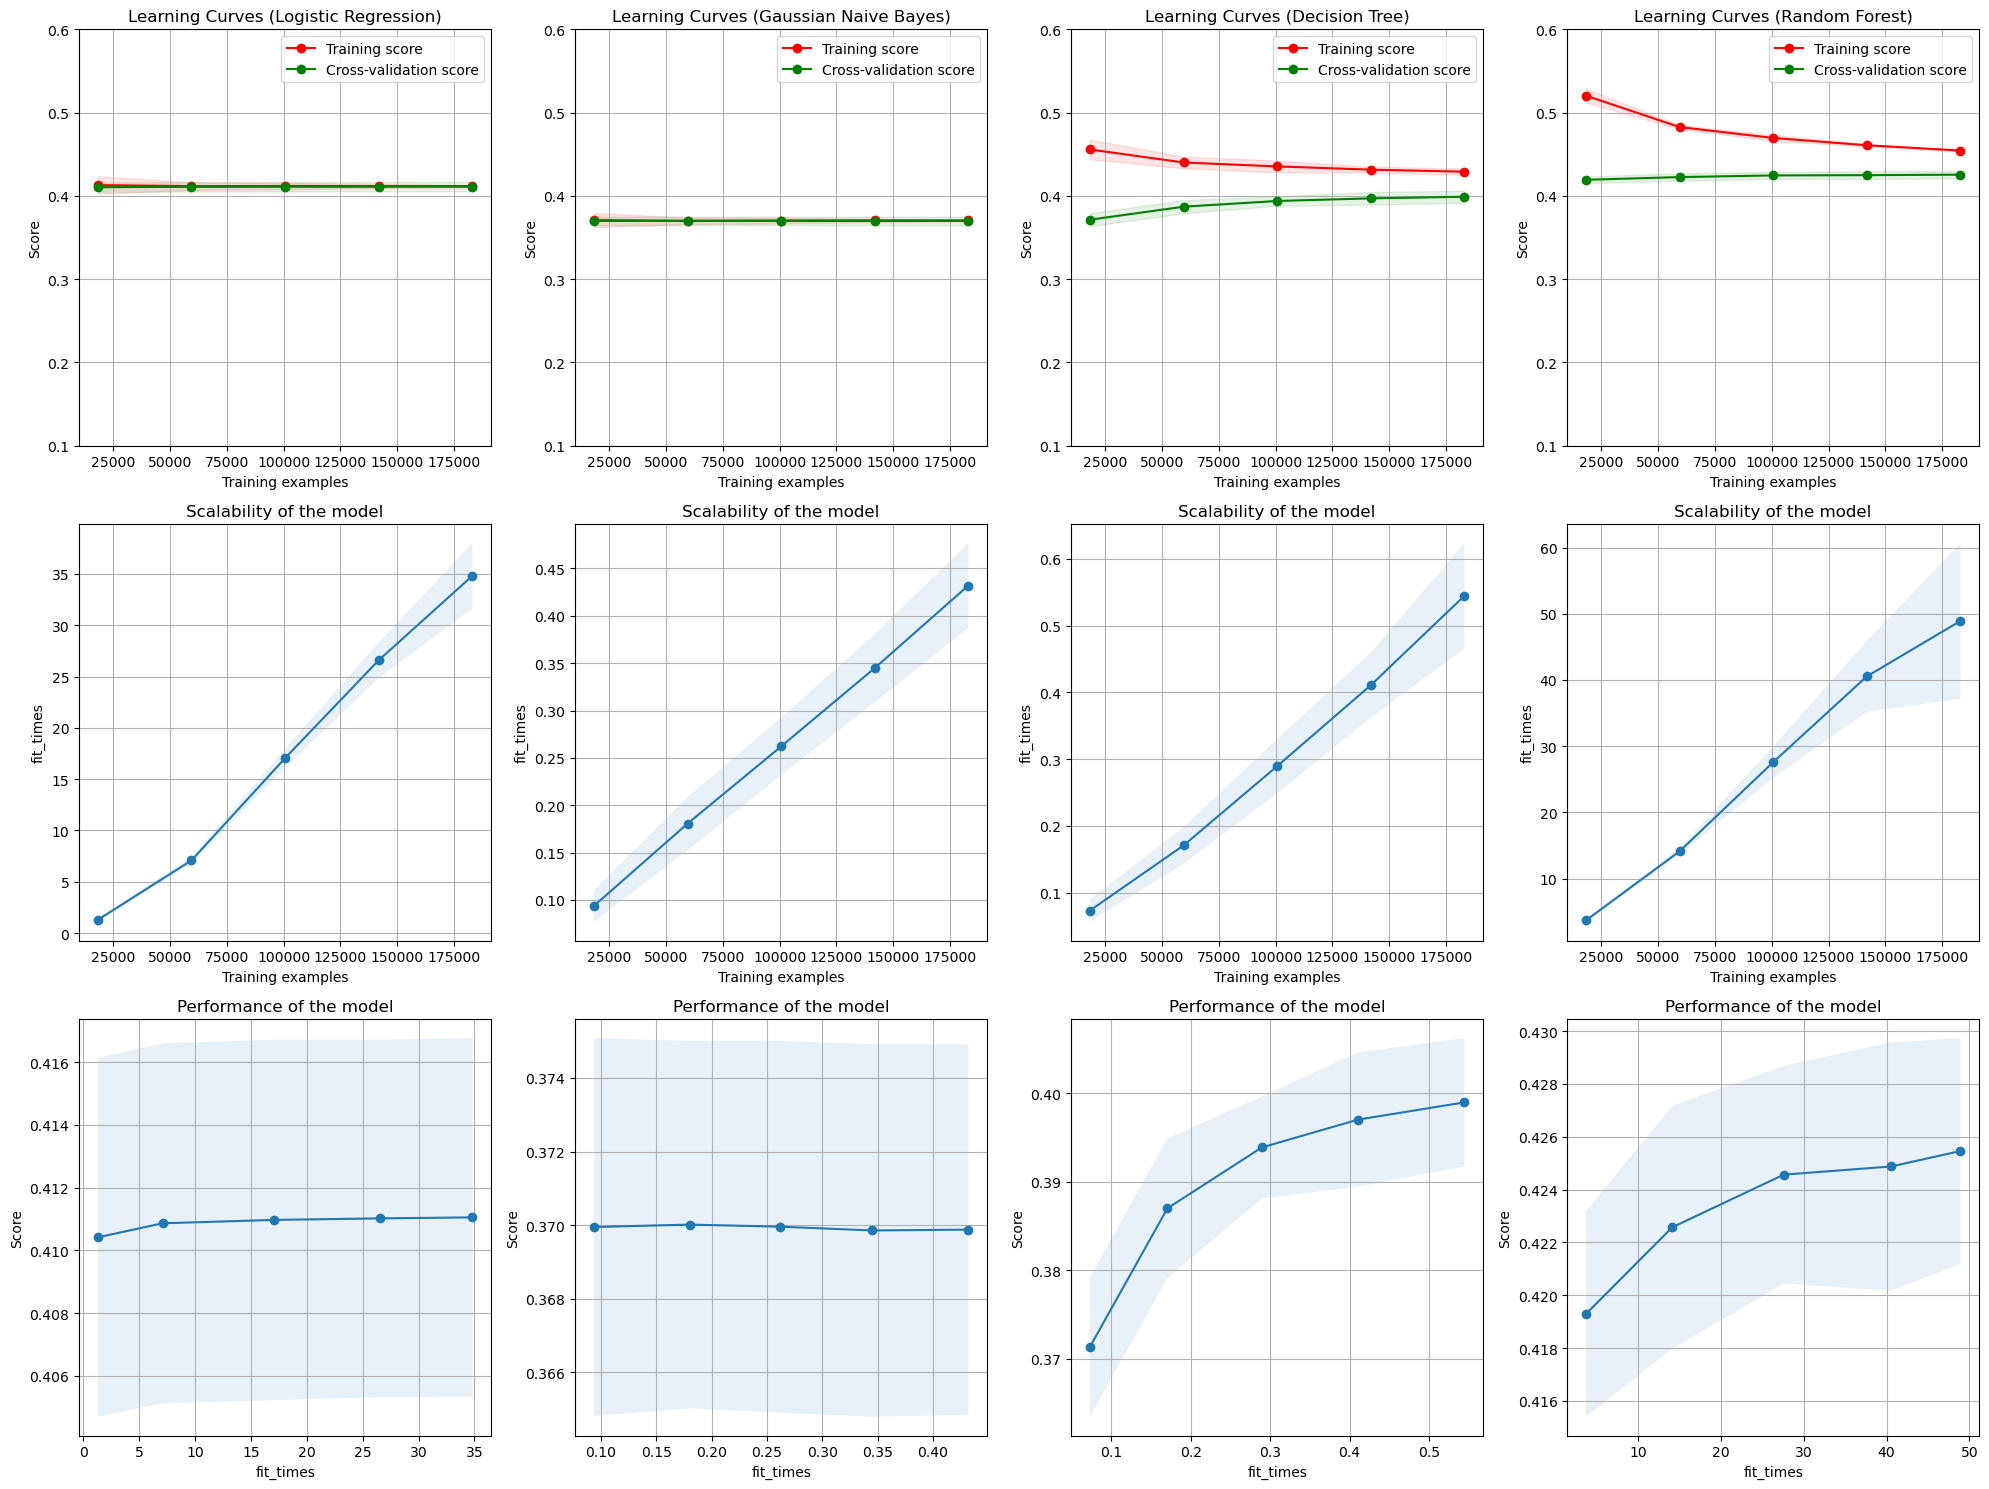

CPU times: total: 4.56 s
Wall time: 8min 5s


In [54]:
%%time
# Set up the plot grid
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Define titles, models, and custom cross-validation strategies
models = {
    'Learning Curves (Logistic Regression)': {
        'model': lr_SMOTE_hyper[0],  # Accessing the trained model from the first element of the list
        'cv': ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    },
    'Learning Curves (Gaussian Naive Bayes)': {
        'model': nb_SMOTE_hyper[0],  # Accessing the trained model
        'cv': ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    },
    'Learning Curves (Decision Tree)': {
        'model': dt_SMOTE_hyper[0],  # Accessing the trained model
        'cv': ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    },
    'Learning Curves (Random Forest)': {
        'model': rf_SMOTE_hyper[0],  # Accessing the trained model
        'cv': ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # Smaller n_splits as this model takes longer time
    }
}

# Plot learning curves for each model with their respective CV strategies
for i, (title, config) in enumerate(models.items()):
    # Extract the model and cross-validation strategy
    model = config['model']
    cv = config['cv']
    
    # Call the plot_learning_curve function
    plot_learning_curve(
        model,
        title,
        X,
        y,
        axes=axes[:, i],  # Plot on the respective subplot column
        ylim=(0.1, 0.6),
        cv=cv,
        scoring=ap_class1_scorer,
        n_jobs=-1  # Use all available processors
    )

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Create a table for performance comparison

In [84]:
def compile_model_metrics(models_dict):
    results = []
    
    for model_name, model in models_dict.items():
        # Extract necessary components
        clf = model[0]
        X_test = model[2]
        y_test = model[4]
        y_pred = model[6]
        y_pred_proba = model[7]
        runtime = model[9]
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        ap = average_precision_score(y_test, y_pred_proba[:, 1])
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'AUC': auc,
            'Average Precision': ap,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1,
            'Runtime (ms)': runtime
        })
    
    # Create DataFrame
    df = pd.DataFrame(results)
    df.set_index('Model', inplace=True)
    
    # Format the numeric columns
    for col in df.columns:
        if col != 'Runtime (ms)':
            df[col] = df[col].apply(lambda x: f"{x:.3f}")
        else:
            df[col] = df[col].apply(lambda x: f"{x:.2f}")
    
    return df



In [85]:
# Create a dictionary of the models
models_dict = {
    'LR Base': lr_base,
    'NB Base': nb_base,
    'DT Base': dt_base,
    'RF Base': rf_base,

    'LR Optimised': lr_SMOTE_hyper,
    'NB Optimised': nb_SMOTE_hyper,
    'DT Optimised': dt_SMOTE_hyper,
    'RF Optimised': rf_SMOTE_hyper
}

# Compile metrics for all models
comparison_df = compile_model_metrics(models_dict)

# Display the table
comparison_df

Accuracy    AUC Average Precision Precision Recall F1-score  \
Model                                                                      
LR Base         0.851  0.802             0.412     0.547  0.154    0.241   
NB Base         0.785  0.780             0.367     0.353  0.485    0.409   
DT Base         0.798  0.597             0.216     0.322  0.290    0.305   
RF Base         0.833  0.750             0.333     0.418  0.225    0.292   
LR Optimised    0.716  0.802             0.410     0.318  0.745    0.446   
NB Optimised    0.737  0.782             0.368     0.321  0.649    0.430   
DT Optimised    0.729  0.782             0.370     0.319  0.682    0.435   
RF Optimised    0.742  0.802             0.412     0.335  0.696    0.452   

             Runtime (ms)  
Model                      
LR Base            187.33  
NB Base            108.96  
DT Base            605.42  
RF Base          14378.17  
LR Optimised      1830.36  
NB Optimised      1399.47  
DT Optimised      1347.81  
RF Optimised     42067.51

In [86]:
# Save to CSV for further analysis
comparison_df.to_csv('model_comparison.csv')

## Let's try for prediction

In [58]:
def to_compare_predict(values_row, actual_class):
    # 1: Prepare the single observation data
    #single_observation = row_as_list0 #[1, 0, 19, 0, 3, 0, 1, 12, 5, 5]  # Example values

    # Convert to a single row DataFrame with the corresponding column names
    feature_names = X. columns #['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', # 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
    single_df = pd.DataFrame([values_row], columns=feature_names)

    # Load the trained models
    models = {
        'Logistic Regression - Base': lr_base[0],
        'Naive Bayes - Base': nb_base[0],
        'Decision Tree - Base': dt_base[0],
        'Random Forest - Base': rf_base[0],
        'Logistic Regression - Optimised': lr_SMOTE_hyper[0],
        'Naive Bayes - Optimised': nb_SMOTE_hyper[0],
        'Decision Tree - Optimised': dt_SMOTE_hyper[0],
        'Random Forest - Optimised': rf_SMOTE_hyper[0]
    }

    # Make predictions and compare
    for name, model in models.items():
        # Predict probability
        prob = model.predict_proba(single_df)[0]
        # Predict class
        pred_class = model.predict(single_df)[0]
        
        print(f"{name}:")
        print(f"  Actual class: {actual_class}")
        print(f"  Predicted class: {pred_class}")
        print(f"  Probability of class 0: {prob[0]:.4f}")
        print(f"  Probability of class 1: {prob[1]:.4f}")
        print()

In [59]:
# Case 1 - No Diabetes
sample0 = data[data['target']==0].sample(1)
sample0

HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  PhysHlth  \
133951     0.0       0.0  23.0                   0.0      3.0       0.0   

        DiffWalk  Age  Education  Income  target  
133951       0.0  5.0        6.0     8.0     0.0

In [60]:
row_as_list0 = sample0.drop('target', axis=1).values.flatten().tolist()
row_as_list0

[0.0, 0.0, 23.0, 0.0, 3.0, 0.0, 0.0, 5.0, 6.0, 8.0]

In [61]:
to_compare_predict(row_as_list0,0)

Logistic Regression - Base:
  Actual class: 0
  Predicted class: 1.0
  Probability of class 0: 0.0018
  Probability of class 1: 0.9982

Naive Bayes - Base:
  Actual class: 0
  Predicted class: 1.0
  Probability of class 0: 0.0000
  Probability of class 1: 1.0000

Decision Tree - Base:
  Actual class: 0
  Predicted class: 0.0
  Probability of class 0: 1.0000
  Probability of class 1: 0.0000

Random Forest - Base:
  Actual class: 0
  Predicted class: 0.0
  Probability of class 0: 0.6900
  Probability of class 1: 0.3100

Logistic Regression - Optimised:
  Actual class: 0
  Predicted class: 1.0
  Probability of class 0: 0.0000
  Probability of class 1: 1.0000

Naive Bayes - Optimised:
  Actual class: 0
  Predicted class: 1.0
  Probability of class 0: 0.0000
  Probability of class 1: 1.0000

Decision Tree - Optimised:
  Actual class: 0
  Predicted class: 1.0
  Probability of class 0: 0.1587
  Probability of class 1: 0.8413

Random Forest - Optimised:
  Actual class: 0
  Predicted class: 1.0

In [62]:
# Case 2 - Prediabetes or Diabetes
sample1 = data[data['target']==1].sample(1)
sample1

HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  PhysHlth  \
142495     1.0       1.0  31.0                   1.0      4.0      25.0   

        DiffWalk   Age  Education  Income  target  
142495       1.0  11.0        4.0     7.0     1.0

In [63]:
row_as_list1 = sample1.drop('target', axis=1).values.flatten().tolist()
row_as_list1

[1.0, 1.0, 31.0, 1.0, 4.0, 25.0, 1.0, 11.0, 4.0, 7.0]

In [64]:
to_compare_predict(row_as_list1,1)

Logistic Regression - Base:
  Actual class: 1
  Predicted class: 1.0
  Probability of class 0: 0.0000
  Probability of class 1: 1.0000

Naive Bayes - Base:
  Actual class: 1
  Predicted class: 1.0
  Probability of class 0: 0.0000
  Probability of class 1: 1.0000

Decision Tree - Base:
  Actual class: 1
  Predicted class: 0.0
  Probability of class 0: 1.0000
  Probability of class 1: 0.0000

Random Forest - Base:
  Actual class: 1
  Predicted class: 0.0
  Probability of class 0: 0.6100
  Probability of class 1: 0.3900

Logistic Regression - Optimised:
  Actual class: 1
  Predicted class: 1.0
  Probability of class 0: 0.0000
  Probability of class 1: 1.0000

Naive Bayes - Optimised:
  Actual class: 1
  Predicted class: 1.0
  Probability of class 0: 0.0000
  Probability of class 1: 1.0000

Decision Tree - Optimised:
  Actual class: 1
  Predicted class: 1.0
  Probability of class 0: 0.1587
  Probability of class 1: 0.8413

Random Forest - Optimised:
  Actual class: 1
  Predicted class: 1.0

#### Visualise feature importances using a horizontal bar plot

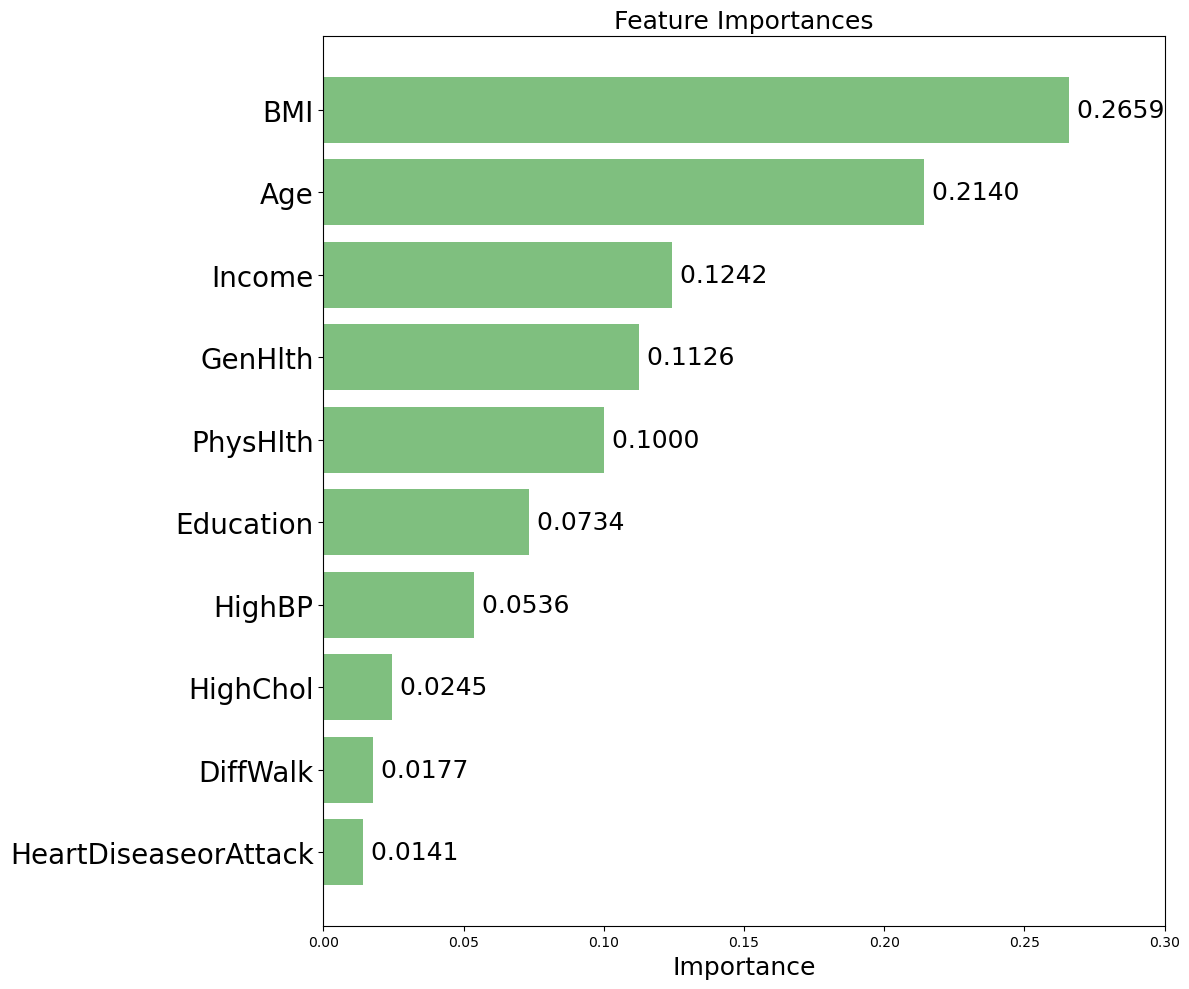

In [83]:
# Create a dictionary of feature importance
feature_importance = {feature: importance for feature, importance in zip(X.columns, rf_SMOTE[0].feature_importances_)}

# Sort the dictionary by importance (descending order)
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Separate features and importances
features, importances = zip(*sorted_features)

# Create horizontal bar plot
plt.figure(figsize=(12, 10))
plt.barh(range(len(features)), importances, align='center', color='green', alpha=0.5)
plt.yticks(range(len(features)), features, fontsize=20)
plt.xlabel('Importance', fontsize=18)
plt.title('Feature Importances', fontsize=18)

# Add importance values at the end of each bar
for i, v in enumerate(importances):
    plt.text(v, i, f' {v:.4f}', va='center', fontsize=18)

# Invert y-axis to show bars in descending order
plt.gca().invert_yaxis()

# Set x-axis limit to 0.3
plt.xlim(0, 0.3)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

In [67]:
from sklearn.tree import export_text

# Example to print the structure of one of the trees in the forest
tree_in_forest = rf_SMOTE_hyper[0].estimators_[2]
tree_rules = export_text(tree_in_forest, feature_names=X.columns.tolist())
print(tree_rules)

|--- BMI <= -0.25
|   |--- HighChol <= -0.55
|   |   |--- BMI <= -0.89
|   |   |   |--- BMI <= -1.21
|   |   |   |   |--- Age <= -0.03
|   |   |   |   |   |--- Education <= 0.02
|   |   |   |   |   |   |--- GenHlth <= 0.38
|   |   |   |   |   |   |   |--- Education <= -1.02
|   |   |   |   |   |   |   |   |--- BMI <= -1.22
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- BMI >  -1.22
|   |   |   |   |   |   |   |   |   |--- Age <= -1.16
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Age >  -1.16
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Education >  -1.02
|   |   |   |   |   |   |   |   |--- GenHlth <= -1.03
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- GenHlth >  -1.03
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- GenHlth >  0.38
|   |   |   |   |   |   |   |--- Income <= 0

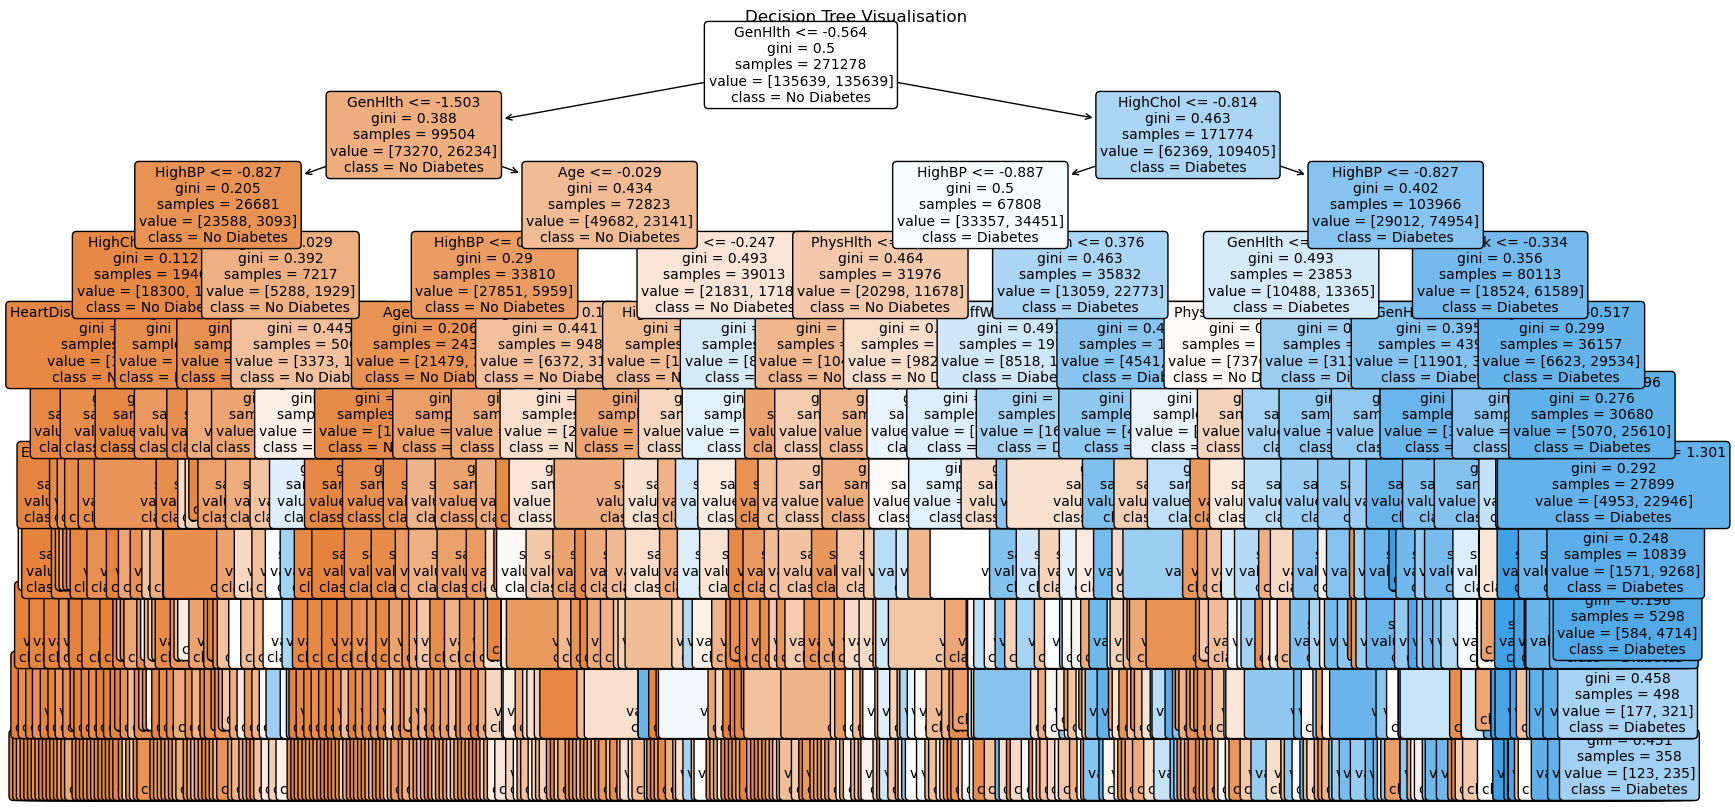

In [68]:
from sklearn.tree import plot_tree
# Visualise the Decision Tree model
tree_to_plot = dt_SMOTE_hyper[0]

# Set up the plot
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(tree_to_plot, 
          feature_names=X.columns.tolist(),
          class_names=['No Diabetes', 'Diabetes'], 
          filled=True, 
          rounded=True, 
          fontsize=10)

# Show the plot
plt.title("Decision Tree Visualisation")
plt.show()